In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
df=pd.read_csv('Uncleaned_DS_jobs.csv')

In [3]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [4]:
df.head()

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description             Company Name  \
0  Description\n\nThe Senior Data Scientist is re...         Healthfirst\n3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...             ManTech\n4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...      Analysis Group\n3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...             INFICON\n3.5   
4  Data Scientist\nAffinity Solutions / Marketing...  Affinity Solutions\n2.9   

        Location            Headquarters                     Size  Founded  \
0   New York, NY            New York, NY   1001 to 5000 employees     1993   
1  Chantilly, VA             Herndon, VA  5001 to 10000 employees     1968   
2     Boston, MA              Boston, MA   1001 to 5000 employees     1981   
3     Newton, MA  Bad Ragaz, Switzerland    501 to 1000 employees     2000   
4   New York, NY            New York, NY      51 to 200 employees     1998   

         Type of ownership                               Industry  \
0   Nonprofit Organization                     Insurance Carriers   
1         Company - Public                 Research & Development   
2  Private Practice / Firm                             Consulting   
3         Company - Public  Electrical & Electronic Manufacturing   
4        Company - Private                Advertising & Marketing   

              Sector                     Revenue  \
0          Insurance    Unknown / Non-Applicable   
1  Business Services      $1 to $2 billion (USD)   
2  Business Services  $100 to $500 million (USD)   
3      Manufacturing  $100 to $500 million (USD)   
4  Business Services    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [5]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [6]:
num_duplicates = df.duplicated().sum()
print("Number of Duplicated Rows:", num_duplicates)

Number of Duplicated Rows: 0


#### Index

In [7]:
df.drop(columns='index',inplace=True)

#### Job Title

In [8]:
df['Job Title']=df['Job Title'].apply(lambda x: x.lower())

In [9]:
df['Job Title'].unique()

array(['sr data scientist', 'data scientist',
       'data scientist / machine learning expert',
       'staff data scientist - analytics',
       'data scientist - statistics, early career', 'data modeler',
       'experienced data scientist', 'data scientist - contract',
       'data analyst ii', 'medical lab scientist',
       'data scientist/machine learning', 'human factors scientist',
       'business intelligence analyst i- data insights',
       'data scientist - risk', 'data scientist-human resources',
       'senior research statistician- data scientist', 'data engineer',
       'associate data scientist', 'business intelligence analyst',
       'senior analyst/data scientist', 'data analyst',
       'machine learning engineer', 'data analyst i',
       'scientist - molecular biology',
       'computational scientist, machine learning',
       'senior data scientist', 'jr. data engineer',
       'e-commerce data analyst', 'data analytics engineer',
       'product data scient

In [10]:
df['Job Title']=df['Job Title'].apply(lambda x:"data scientist"  if 'data scientist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"data analyst"  if 'data analyst' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"data modeler"  if 'data modeler' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"data engineer"  if 'data engineer' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"machine learning engineer"  if 'machine learning' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"research scientist"  if 'research' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"business analyst"  if 'business' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'molecular' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'biology' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"data science related"  if 'data science' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'biomarker' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'biometrics' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'laboratory' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'toxicologist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"deep learning engineer"  if 'computer vision / deep learning scientist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"production engineer"  if 'production engineer' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"material scientist"  if 'materials' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"deep learning engineer"  if 'sensors' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"staff scientist"  if 'staff scientist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"computational scientist"  if 'computational behavioral scientist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"principal scientist"  if 'principal scientist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"principal analyst"  if 'principal data & analytics platform engineer' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"deep learning engineer"  if 'applied' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'ngs scientist' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"data analyst"  if 'data analytics engineer' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"analytics manager"  if 'analytics manager' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"data analyst"  if 'data insights analyst' in x else x)
df['Job Title']=df['Job Title'].apply(lambda x:"HealthCare data scientist"  if 'extractables' in x else x)

In [11]:
df['Job Title'].unique()

array(['data scientist', 'data modeler', 'data analyst',
       'medical lab scientist', 'human factors scientist',
       'business analyst', 'data engineer', 'machine learning engineer',
       'HealthCare data scientist', 'purification scientist',
       'data science related', 'data integration and modeling engineer',
       'research scientist', 'analytics manager', 'staff scientist',
       'computational scientist', 'production engineer',
       'statistical scientist', 'principal scientist',
       'real world evidence (rwe) scientist', 'computer scientist 1',
       'chief scientist', 'development scientist, voltaren',
       'principal analyst', 'decision scientist',
       'deep learning engineer',
       'manager, field application scientist, southeast',
       'data architect',
       'information systems engineering specialist (engineering scientist)',
       'material scientist'], dtype=object)

#### Salary

In [12]:
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [13]:
df["Salary Estimate"] = df["Salary Estimate"].replace("(Glassdoor est.)", "",regex=True) # Remove the "Glassdoor est." keyword
df["Salary Estimate"] = df["Salary Estimate"].replace("(Employer est.)", "",regex=True) # Remove the "Employer est." keyword

df['Salary Estimate'].unique()

array(['$137K-$171K ()', '$75K-$131K ()', '$79K-$131K ()',
       '$99K-$132K ()', '$90K-$109K ()', '$101K-$165K ()', '$56K-$97K ()',
       '$79K-$106K ()', '$71K-$123K ()', '$90K-$124K ()', '$91K-$150K ()',
       '$141K-$225K ()', '$145K-$225K()', '$79K-$147K ()',
       '$122K-$146K ()', '$112K-$116K ()', '$110K-$163K ()',
       '$124K-$198K ()', '$79K-$133K ()', '$69K-$116K ()', '$31K-$56K ()',
       '$95K-$119K ()', '$212K-$331K ()', '$66K-$112K ()',
       '$128K-$201K ()', '$138K-$158K ()', '$80K-$132K ()',
       '$87K-$141K ()', '$92K-$155K ()', '$105K-$167K ()'], dtype=object)

In [14]:
df["Salary Estimate"] = df["Salary Estimate"].replace("K", "",regex=True) # Remove the Letter K
df['Salary Estimate'].unique()

array(['$137-$171 ()', '$75-$131 ()', '$79-$131 ()', '$99-$132 ()',
       '$90-$109 ()', '$101-$165 ()', '$56-$97 ()', '$79-$106 ()',
       '$71-$123 ()', '$90-$124 ()', '$91-$150 ()', '$141-$225 ()',
       '$145-$225()', '$79-$147 ()', '$122-$146 ()', '$112-$116 ()',
       '$110-$163 ()', '$124-$198 ()', '$79-$133 ()', '$69-$116 ()',
       '$31-$56 ()', '$95-$119 ()', '$212-$331 ()', '$66-$112 ()',
       '$128-$201 ()', '$138-$158 ()', '$80-$132 ()', '$87-$141 ()',
       '$92-$155 ()', '$105-$167 ()'], dtype=object)

In [15]:
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.strip('()')) # Remove the "()" from the end
df['Salary Estimate'].unique()

array(['$137-$171 ', '$75-$131 ', '$79-$131 ', '$99-$132 ', '$90-$109 ',
       '$101-$165 ', '$56-$97 ', '$79-$106 ', '$71-$123 ', '$90-$124 ',
       '$91-$150 ', '$141-$225 ', '$145-$225', '$79-$147 ', '$122-$146 ',
       '$112-$116 ', '$110-$163 ', '$124-$198 ', '$79-$133 ', '$69-$116 ',
       '$31-$56 ', '$95-$119 ', '$212-$331 ', '$66-$112 ', '$128-$201 ',
       '$138-$158 ', '$80-$132 ', '$87-$141 ', '$92-$155 ', '$105-$167 '],
      dtype=object)

In [16]:
df["Salary Estimate"] = df["Salary Estimate"].replace("\$", "",regex=True) # Remove the dollar '$' sign
df['Salary Estimate'].unique()

array(['137-171 ', '75-131 ', '79-131 ', '99-132 ', '90-109 ', '101-165 ',
       '56-97 ', '79-106 ', '71-123 ', '90-124 ', '91-150 ', '141-225 ',
       '145-225', '79-147 ', '122-146 ', '112-116 ', '110-163 ',
       '124-198 ', '79-133 ', '69-116 ', '31-56 ', '95-119 ', '212-331 ',
       '66-112 ', '128-201 ', '138-158 ', '80-132 ', '87-141 ', '92-155 ',
       '105-167 '], dtype=object)

In [17]:
df["Salary Estimate"] = df["Salary Estimate"].replace("-", " ",regex=True) # Remove the '-' sign
df['Salary Estimate'].unique()

array(['137 171 ', '75 131 ', '79 131 ', '99 132 ', '90 109 ', '101 165 ',
       '56 97 ', '79 106 ', '71 123 ', '90 124 ', '91 150 ', '141 225 ',
       '145 225', '79 147 ', '122 146 ', '112 116 ', '110 163 ',
       '124 198 ', '79 133 ', '69 116 ', '31 56 ', '95 119 ', '212 331 ',
       '66 112 ', '128 201 ', '138 158 ', '80 132 ', '87 141 ', '92 155 ',
       '105 167 '], dtype=object)

In [18]:
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.strip(' ')) # Remove the whitespaces
df['Salary Estimate'].unique()

array(['137 171', '75 131', '79 131', '99 132', '90 109', '101 165',
       '56 97', '79 106', '71 123', '90 124', '91 150', '141 225',
       '145 225', '79 147', '122 146', '112 116', '110 163', '124 198',
       '79 133', '69 116', '31 56', '95 119', '212 331', '66 112',
       '128 201', '138 158', '80 132', '87 141', '92 155', '105 167'],
      dtype=object)

In [19]:
df[['Salary Estimate Lower Bound','Salary Estimate Upper Bound']]=df["Salary Estimate"].str.split(" ",expand=True)

In [20]:
df.head(2)

Job Title Salary Estimate  \
0  data scientist         137 171   
1  data scientist         137 171   

                                     Job Description      Company Name  \
0  Description\n\nThe Senior Data Scientist is re...  Healthfirst\n3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...      ManTech\n4.2   

        Location  Headquarters                     Size  Founded  \
0   New York, NY  New York, NY   1001 to 5000 employees     1993   
1  Chantilly, VA   Herndon, VA  5001 to 10000 employees     1968   

        Type of ownership                Industry             Sector  \
0  Nonprofit Organization      Insurance Carriers          Insurance   
1        Company - Public  Research & Development  Business Services   

                    Revenue                              Competitors  \
0  Unknown / Non-Applicable  EmblemHealth, UnitedHealth Group, Aetna   
1    $1 to $2 billion (USD)                                       -1   

  Salary Estimate Lower Bound Salary Estimate Upper Bound  
0                         137                         171  
1                         137                         171

In [21]:
df.head()

Job Title Salary Estimate  \
0  data scientist         137 171   
1  data scientist         137 171   
2  data scientist         137 171   
3  data scientist         137 171   
4  data scientist         137 171   

                                     Job Description             Company Name  \
0  Description\n\nThe Senior Data Scientist is re...         Healthfirst\n3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...             ManTech\n4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...      Analysis Group\n3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...             INFICON\n3.5   
4  Data Scientist\nAffinity Solutions / Marketing...  Affinity Solutions\n2.9   

        Location            Headquarters                     Size  Founded  \
0   New York, NY            New York, NY   1001 to 5000 employees     1993   
1  Chantilly, VA             Herndon, VA  5001 to 10000 employees     1968   
2     Boston, MA              Boston, MA   1001 to 5000 employees     1981   
3     Newton, MA  Bad Ragaz, Switzerland    501 to 1000 employees     2000   
4   New York, NY            New York, NY      51 to 200 employees     1998   

         Type of ownership                               Industry  \
0   Nonprofit Organization                     Insurance Carriers   
1         Company - Public                 Research & Development   
2  Private Practice / Firm                             Consulting   
3         Company - Public  Electrical & Electronic Manufacturing   
4        Company - Private                Advertising & Marketing   

              Sector                     Revenue  \
0          Insurance    Unknown / Non-Applicable   
1  Business Services      $1 to $2 billion (USD)   
2  Business Services  $100 to $500 million (USD)   
3      Manufacturing  $100 to $500 million (USD)   
4  Business Services    Unknown / Non-Applicable   

                                         Competitors  \
0            EmblemHealth, UnitedHealth Group, Aetna   
1                                                 -1   
2                                                 -1   
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...   
4               Commerce Signals, Cardlytics, Yodlee   

  Salary Estimate Lower Bound Salary Estimate Upper Bound  
0                         137                         171  
1                         137                         171  
2                         137                         171  
3                         137                         171  
4                         137                         171

In [22]:
df["Salary Estimate Lower Bound"] = df["Salary Estimate Lower Bound"].apply(lambda x:int(x))
df["Salary Estimate Upper Bound"] = df["Salary Estimate Upper Bound"].apply(lambda x:int(x))

In [23]:
df.drop(columns=["Salary Estimate"],inplace=True)

In [24]:
df['Average Salary Expect']=(df["Salary Estimate Lower Bound"]+df["Salary Estimate Upper Bound"])//2

In [25]:
df.head(2)

Job Title                                    Job Description  \
0  data scientist  Description\n\nThe Senior Data Scientist is re...   
1  data scientist  Secure our Nation, Ignite your Future\n\nJoin ...   

       Company Name       Location  Headquarters                     Size  \
0  Healthfirst\n3.1   New York, NY  New York, NY   1001 to 5000 employees   
1      ManTech\n4.2  Chantilly, VA   Herndon, VA  5001 to 10000 employees   

   Founded       Type of ownership                Industry             Sector  \
0     1993  Nonprofit Organization      Insurance Carriers          Insurance   
1     1968        Company - Public  Research & Development  Business Services   

                    Revenue                              Competitors  \
0  Unknown / Non-Applicable  EmblemHealth, UnitedHealth Group, Aetna   
1    $1 to $2 billion (USD)                                       -1   

   Salary Estimate Lower Bound  Salary Estimate Upper Bound  \
0                          137                          171   
1                          137                          171   

   Average Salary Expect  
0                    154  
1                    154

#### Size

In [26]:
df["Size"].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [27]:
df["Size"] = df["Size"].replace("employees", "",regex=True)  # Remove the "employees" keyword
df["Size"].unique()

array(['1001 to 5000 ', '5001 to 10000 ', '501 to 1000 ', '51 to 200 ',
       '10000+ ', '201 to 500 ', '1 to 50 ', '-1', 'Unknown'],
      dtype=object)

In [28]:
df["Size"] = df["Size"].replace("to", " ",regex=True) # Remove the "to" keyword
df["Size"].unique()

array(['1001   5000 ', '5001   10000 ', '501   1000 ', '51   200 ',
       '10000+ ', '201   500 ', '1   50 ', '-1', 'Unknown'], dtype=object)

In [29]:
df["Size"] = df["Size"].replace({'\+':" 10000"},regex=True) # Remove the "+" sign
df["Size"].unique()

array(['1001   5000 ', '5001   10000 ', '501   1000 ', '51   200 ',
       '10000 10000 ', '201   500 ', '1   50 ', '-1', 'Unknown'],
      dtype=object)

In [30]:
df["Size"] = df["Size"].apply(lambda x: x.strip(' ')) # Remove the whitespaces
df["Size"].unique()

array(['1001   5000', '5001   10000', '501   1000', '51   200',
       '10000 10000', '201   500', '1   50', '-1', 'Unknown'],
      dtype=object)

In [31]:
df["Size"] = df["Size"].replace("   ", " ",regex=True) # Replace double space with single space so that we can split the column
df["Size"].unique()

array(['1001 5000', '5001 10000', '501 1000', '51 200', '10000 10000',
       '201 500', '1 50', '-1', 'Unknown'], dtype=object)

In [32]:
df[['Size Lower Bound','Size Upper Bound']] = df["Size"].str.split(" ",expand=True) # Split the Size column in upper and lower bound
df.drop(columns=['Size'], inplace=True)
df.head(4)

Job Title                                    Job Description  \
0  data scientist  Description\n\nThe Senior Data Scientist is re...   
1  data scientist  Secure our Nation, Ignite your Future\n\nJoin ...   
2  data scientist  Overview\n\n\nAnalysis Group is one of the lar...   
3  data scientist  JOB DESCRIPTION:\n\nDo you have a passion for ...   

          Company Name       Location            Headquarters  Founded  \
0     Healthfirst\n3.1   New York, NY            New York, NY     1993   
1         ManTech\n4.2  Chantilly, VA             Herndon, VA     1968   
2  Analysis Group\n3.8     Boston, MA              Boston, MA     1981   
3         INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland     2000   

         Type of ownership                               Industry  \
0   Nonprofit Organization                     Insurance Carriers   
1         Company - Public                 Research & Development   
2  Private Practice / Firm                             Consulting   
3         Company - Public  Electrical & Electronic Manufacturing   

              Sector                     Revenue  \
0          Insurance    Unknown / Non-Applicable   
1  Business Services      $1 to $2 billion (USD)   
2  Business Services  $100 to $500 million (USD)   
3      Manufacturing  $100 to $500 million (USD)   

                                         Competitors  \
0            EmblemHealth, UnitedHealth Group, Aetna   
1                                                 -1   
2                                                 -1   
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...   

   Salary Estimate Lower Bound  Salary Estimate Upper Bound  \
0                          137                          171   
1                          137                          171   
2                          137                          171   
3                          137                          171   

   Average Salary Expect Size Lower Bound Size Upper Bound  
0                    154             1001             5000  
1                    154             5001            10000  
2                    154             1001             5000  
3                    154              501             1000

In [33]:
df["Size Lower Bound"] = df["Size Lower Bound"].replace("-1", "Unknown",regex=True)

In [34]:
df['Size Upper Bound'].unique()

array(['5000', '10000', '1000', '200', '500', '50', None], dtype=object)

In [35]:
df[["Size Lower Bound",'Size Upper Bound']].value_counts()

Size Lower Bound  Size Upper Bound
51                200                 135
1001              5000                104
1                 50                   86
201               500                  85
10000             10000                80
501               1000                 77
5001              10000                61
dtype: int64

In [36]:
df['Size Lower Bound'].replace('Unknown','51',inplace=True)
df['Size Upper Bound'].fillna('200',inplace=True)

In [37]:
df["Size Lower Bound"] = df["Size Lower Bound"].apply(lambda x:int(x))
df["Size Upper Bound"] = df["Size Upper Bound"].apply(lambda x:int(x))

In [38]:
df["Average Size"]=(df["Size Lower Bound"]+df["Size Upper Bound"])//2

#### Company

In [39]:
df['Company Name'].unique()

array(['Healthfirst\n3.1', 'ManTech\n4.2', 'Analysis Group\n3.8',
       'INFICON\n3.5', 'Affinity Solutions\n2.9', 'HG Insights\n4.2',
       'Novartis\n3.9', 'iRobot\n3.5', 'Intuit - Data\n4.4',
       'XSELL Technologies\n3.6', 'Novetta\n4.5', '1904labs\n4.7',
       'PNNL\n3.7', 'Old World Industries\n3.1',
       'Mathematica Policy Research\n3.4',
       'Guzman & Griffin Technologies (GGTI)\n4.4',
       'Upside Business Travel\n4.1', 'Buckman\n3.5',
       'Insight Enterprises, Inc.\n4.2', 'Tower Health\n3.5',
       'Triplebyte\n3.2', 'PulsePoint\n4.3', 'Exponent\n3.5',
       'Guardian Life\n3.5',
       'Spectrum Communications and Consulting\n3.4',
       'Oversight Systems\n4.7', 'LSQ\n4.2',
       'MIT Lincoln Laboratory\n3.8', 'Kingfisher Systems\n4.5',
       'Formation\n2.8', 'Cohere Health\n5.0', 'Acuity Insurance\n4.8',
       'Chef\n3.6', 'Puget Sound Energy\n3.3', 'Sandhills Global\n2.7',
       'A Place for Mom\n2.7', 'Great-Circle Technologies\n2.2',
       'Edmu

In [40]:
df["Company Name"]=df["Company Name"].str.partition("\n")[0]

In [41]:
df.head()

Job Title                                    Job Description  \
0  data scientist  Description\n\nThe Senior Data Scientist is re...   
1  data scientist  Secure our Nation, Ignite your Future\n\nJoin ...   
2  data scientist  Overview\n\n\nAnalysis Group is one of the lar...   
3  data scientist  JOB DESCRIPTION:\n\nDo you have a passion for ...   
4  data scientist  Data Scientist\nAffinity Solutions / Marketing...   

         Company Name       Location            Headquarters  Founded  \
0         Healthfirst   New York, NY            New York, NY     1993   
1             ManTech  Chantilly, VA             Herndon, VA     1968   
2      Analysis Group     Boston, MA              Boston, MA     1981   
3             INFICON     Newton, MA  Bad Ragaz, Switzerland     2000   
4  Affinity Solutions   New York, NY            New York, NY     1998   

         Type of ownership                               Industry  \
0   Nonprofit Organization                     Insurance Carriers   
1         Company - Public                 Research & Development   
2  Private Practice / Firm                             Consulting   
3         Company - Public  Electrical & Electronic Manufacturing   
4        Company - Private                Advertising & Marketing   

              Sector                     Revenue  \
0          Insurance    Unknown / Non-Applicable   
1  Business Services      $1 to $2 billion (USD)   
2  Business Services  $100 to $500 million (USD)   
3      Manufacturing  $100 to $500 million (USD)   
4  Business Services    Unknown / Non-Applicable   

                                         Competitors  \
0            EmblemHealth, UnitedHealth Group, Aetna   
1                                                 -1   
2                                                 -1   
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...   
4               Commerce Signals, Cardlytics, Yodlee   

   Salary Estimate Lower Bound  Salary Estimate Upper Bound  \
0                          137                          171   
1                          137                          171   
2                          137                          171   
3                          137                          171   
4                          137                          171   

   Average Salary Expect  Size Lower Bound  Size Upper Bound  Average Size  
0                    154              1001              5000          3000  
1                    154              5001             10000          7500  
2                    154              1001              5000          3000  
3                    154               501              1000           750  
4                    154                51               200           125

#### Type of ownership

In [42]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [43]:
df["Type of ownership"] = df["Type of ownership"].replace("-1", "Unknown",regex=True)
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', 'Unknown',
       'Hospital', 'Self-employed', 'College / University', 'Contract'],
      dtype=object)

In [44]:
df['Type of ownership'].value_counts()

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Unknown                            31
Subsidiary or Business Segment     28
Government                         10
Other Organization                  5
Private Practice / Firm             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

In [45]:
df['Type of ownership'].replace('Unknown','Company - Private',inplace=True)

In [46]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', 'Hospital',
       'Self-employed', 'College / University', 'Contract'], dtype=object)

#### Industry

In [47]:
df['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [48]:
df["Industry"] = df["Industry"].replace("-1", "Unknown",regex=True)
df['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', 'Unknown', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       

In [49]:
df['Industry'].value_counts()

Unknown                                     71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food & Bevera

In [50]:
df.head()

Job Title                                    Job Description  \
0  data scientist  Description\n\nThe Senior Data Scientist is re...   
1  data scientist  Secure our Nation, Ignite your Future\n\nJoin ...   
2  data scientist  Overview\n\n\nAnalysis Group is one of the lar...   
3  data scientist  JOB DESCRIPTION:\n\nDo you have a passion for ...   
4  data scientist  Data Scientist\nAffinity Solutions / Marketing...   

         Company Name       Location            Headquarters  Founded  \
0         Healthfirst   New York, NY            New York, NY     1993   
1             ManTech  Chantilly, VA             Herndon, VA     1968   
2      Analysis Group     Boston, MA              Boston, MA     1981   
3             INFICON     Newton, MA  Bad Ragaz, Switzerland     2000   
4  Affinity Solutions   New York, NY            New York, NY     1998   

         Type of ownership                               Industry  \
0   Nonprofit Organization                     Insurance Carriers   
1         Company - Public                 Research & Development   
2  Private Practice / Firm                             Consulting   
3         Company - Public  Electrical & Electronic Manufacturing   
4        Company - Private                Advertising & Marketing   

              Sector                     Revenue  \
0          Insurance    Unknown / Non-Applicable   
1  Business Services      $1 to $2 billion (USD)   
2  Business Services  $100 to $500 million (USD)   
3      Manufacturing  $100 to $500 million (USD)   
4  Business Services    Unknown / Non-Applicable   

                                         Competitors  \
0            EmblemHealth, UnitedHealth Group, Aetna   
1                                                 -1   
2                                                 -1   
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...   
4               Commerce Signals, Cardlytics, Yodlee   

   Salary Estimate Lower Bound  Salary Estimate Upper Bound  \
0                          137                          171   
1                          137                          171   
2                          137                          171   
3                          137                          171   
4                          137                          171   

   Average Salary Expect  Size Lower Bound  Size Upper Bound  Average Size  
0                    154              1001              5000          3000  
1                    154              5001             10000          7500  
2                    154              1001              5000          3000  
3                    154               501              1000           750  
4                    154                51               200           125

#### Sector

In [51]:
df['Sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [52]:
df["Sector"] = df["Sector"].replace("-1", "Unknown",regex=True)

In [53]:
df['Sector'].value_counts()

Information Technology                188
Business Services                     120
Unknown                                71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64

In [54]:
df.loc[df['Sector']=='Unknown','Sector']='Information Technology'

In [55]:
df.loc[(df['Sector']=="Information Technology")]['Industry'].value_counts()

Unknown                                    71
IT Services                                61
Computer Hardware & Software               57
Enterprise Software & Network Solutions    43
Internet                                   27
Name: Industry, dtype: int64

In [56]:
df.loc[df['Industry']=='Unknown','Industry']='IT Services'

#### Revenue

In [57]:
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', '-1'], dtype=object)

In [58]:
df["Revenue"] = df["Revenue"].replace("\(USD\)", "",regex=True) # Remove the Letter K
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion ',
       '$100 to $500 million ', '$10+ billion ', '$2 to $5 billion ',
       '$500 million to $1 billion ', '$5 to $10 billion ',
       '$10 to $25 million ', '$25 to $50 million ',
       '$50 to $100 million ', '$1 to $5 million ', '$5 to $10 million ',
       'Less than $1 million ', '-1'], dtype=object)

In [59]:
df['Revenue']=df['Revenue'].apply(lambda x:"$1000 to $2000 million "  if '$1 to $2 billion ' in x else x)
df['Revenue']=df['Revenue'].apply(lambda x:"$10000+ million "  if '$10+ billion ' in x else x)
df['Revenue']=df['Revenue'].apply(lambda x:"$2000 to $5000 million "  if '$2 to $5 billion ' in x else x)
df['Revenue']=df['Revenue'].apply(lambda x:"$500 to $1000 million "  if '$500 million to $1 billion ' in x else x)
df['Revenue']=df['Revenue'].apply(lambda x:"$5000 to $10000 million "  if '$5 to $10 billion ' in x else x)
df['Revenue']=df['Revenue'].apply(lambda x:"$0 to $1 million "  if 'Less than $1 million ' in x else x)

df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1000 to $2000 million ',
       '$100 to $500 million ', '$10000+ million ',
       '$2000 to $5000 million ', '$500 to $1000 million ',
       '$5000 to $10000 million ', '$10 to $25 million ',
       '$25 to $50 million ', '$50 to $100 million ', '$1 to $5 million ',
       '$5 to $10 million ', '$0 to $1 million ', '-1'], dtype=object)

In [60]:
df["Revenue"] = df["Revenue"].replace("-1", "Unknown",regex=True)
df["Revenue"] = df["Revenue"].replace("Unknown / Non-Applicable", "Unknown",regex=True)
df['Revenue'].unique()

array(['Unknown', '$1000 to $2000 million ', '$100 to $500 million ',
       '$10000+ million ', '$2000 to $5000 million ',
       '$500 to $1000 million ', '$5000 to $10000 million ',
       '$10 to $25 million ', '$25 to $50 million ',
       '$50 to $100 million ', '$1 to $5 million ', '$5 to $10 million ',
       '$0 to $1 million '], dtype=object)

In [61]:
df["Revenue"] = df["Revenue"].replace(" million ", "",regex=True)  # Remove the "employees" keyword
df["Revenue"].unique()

array(['Unknown', '$1000 to $2000', '$100 to $500', '$10000+',
       '$2000 to $5000', '$500 to $1000', '$5000 to $10000', '$10 to $25',
       '$25 to $50', '$50 to $100', '$1 to $5', '$5 to $10', '$0 to $1'],
      dtype=object)

In [62]:
df["Revenue"] = df["Revenue"].replace("to", " ",regex=True) # Remove the "to" keyword
df["Revenue"].unique()

array(['Unknown', '$1000   $2000', '$100   $500', '$10000+',
       '$2000   $5000', '$500   $1000', '$5000   $10000', '$10   $25',
       '$25   $50', '$50   $100', '$1   $5', '$5   $10', '$0   $1'],
      dtype=object)

In [63]:
df["Revenue"] = df["Revenue"].replace("   ", " ",regex=True) # Replace double space with single space so that we can split the column
df["Revenue"].unique()

array(['Unknown', '$1000 $2000', '$100 $500', '$10000+', '$2000 $5000',
       '$500 $1000', '$5000 $10000', '$10 $25', '$25 $50', '$50 $100',
       '$1 $5', '$5 $10', '$0 $1'], dtype=object)

In [64]:
df["Revenue"] = df["Revenue"].replace("\$", "",regex=True) # Remove the dollar '$' sign
df['Revenue'].unique()

array(['Unknown', '1000 2000', '100 500', '10000+', '2000 5000',
       '500 1000', '5000 10000', '10 25', '25 50', '50 100', '1 5',
       '5 10', '0 1'], dtype=object)

In [65]:
df["Revenue"] = df["Revenue"].replace({'\+':" 10000"},regex=True) # Remove the "+" sign
df["Revenue"].unique()

array(['Unknown', '1000 2000', '100 500', '10000 10000', '2000 5000',
       '500 1000', '5000 10000', '10 25', '25 50', '50 100', '1 5',
       '5 10', '0 1'], dtype=object)

In [66]:
df[['Revenue Lower Bound','Revenue Upper Bound']] = df["Revenue"].str.split(" ",expand=True) # Split the Size column in upper and lower bound
df.drop(columns=['Revenue'], inplace=True)
df.head(4)

Job Title                                    Job Description  \
0  data scientist  Description\n\nThe Senior Data Scientist is re...   
1  data scientist  Secure our Nation, Ignite your Future\n\nJoin ...   
2  data scientist  Overview\n\n\nAnalysis Group is one of the lar...   
3  data scientist  JOB DESCRIPTION:\n\nDo you have a passion for ...   

     Company Name       Location            Headquarters  Founded  \
0     Healthfirst   New York, NY            New York, NY     1993   
1         ManTech  Chantilly, VA             Herndon, VA     1968   
2  Analysis Group     Boston, MA              Boston, MA     1981   
3         INFICON     Newton, MA  Bad Ragaz, Switzerland     2000   

         Type of ownership                               Industry  \
0   Nonprofit Organization                     Insurance Carriers   
1         Company - Public                 Research & Development   
2  Private Practice / Firm                             Consulting   
3         Company - Public  Electrical & Electronic Manufacturing   

              Sector                                        Competitors  \
0          Insurance            EmblemHealth, UnitedHealth Group, Aetna   
1  Business Services                                                 -1   
2  Business Services                                                 -1   
3      Manufacturing  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...   

   Salary Estimate Lower Bound  Salary Estimate Upper Bound  \
0                          137                          171   
1                          137                          171   
2                          137                          171   
3                          137                          171   

   Average Salary Expect  Size Lower Bound  Size Upper Bound  Average Size  \
0                    154              1001              5000          3000   
1                    154              5001             10000          7500   
2                    154              1001              5000          3000   
3                    154               501              1000           750   

  Revenue Lower Bound Revenue Upper Bound  
0             Unknown                None  
1                1000                2000  
2                 100                 500  
3                 100                 500

In [67]:
df[["Revenue Lower Bound","Revenue Upper Bound"]].value_counts()

Revenue Lower Bound  Revenue Upper Bound
100                  500                    94
10000                10000                  63
2000                 5000                   45
10                   25                     41
1000                 2000                   36
25                   50                     36
1                    5                      31
50                   100                    31
500                  1000                   19
0                    1                      14
5                    10                     14
5000                 10000                   8
dtype: int64

In [68]:
df["Revenue Lower Bound"].unique()
df["Revenue Lower Bound"]=df["Revenue Lower Bound"].replace("Unknown",'100')
df["Revenue Upper Bound"]=df["Revenue Upper Bound"].fillna('500')

In [69]:
df["Revenue Lower Bound"] = df["Revenue Lower Bound"].apply(lambda x:int(x))
df["Revenue Upper Bound"] = df["Revenue Upper Bound"].apply(lambda x:int(x))

In [70]:
df["Average Revenue"]=(df["Revenue Lower Bound"]+df["Revenue Upper Bound"])//2

#### Headquarters

In [71]:
df[['Place','State','Country']]=df["Location"].str.split(",",expand=True)

In [72]:
df['State'].unique()

array([' NY', ' VA', ' MA', ' CA', ' IL', ' MO', ' WA', ' DC', None,
       ' TN', ' TX', ' PA', ' AZ', ' WI', ' GA', ' FL', ' NE', ' KS',
       ' NH', ' NJ', ' LA', ' OH', ' IN', ' MD', ' CO', ' UT', ' OR',
       ' MI', ' SC', ' MS', ' AL', ' RI', ' IA', ' MN', ' OK', ' CT',
       ' NC', ' DE', ' Anne Arundel', ' WV'], dtype=object)

In [73]:
df.loc[df['Country'].notna(),'State']=' MD'

In [74]:
df.drop(columns=['Country'],inplace=True)

### 1. Identify the top five industries with the highest number of job openings

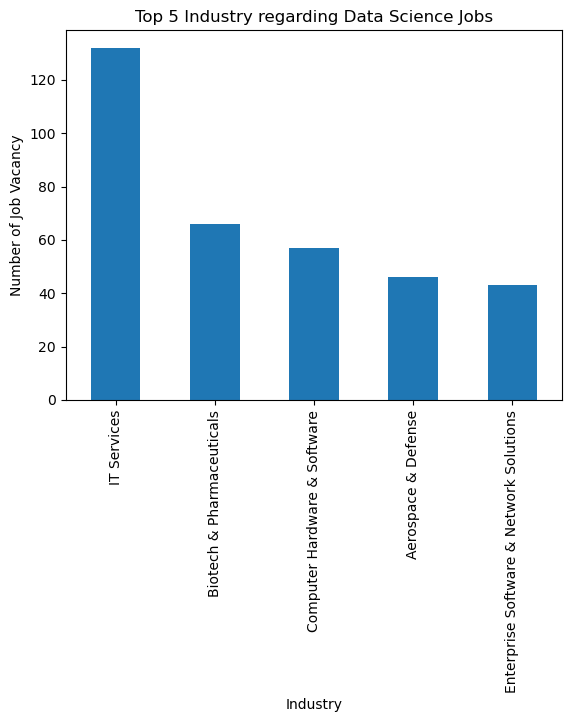

In [75]:
#plt.figure(figsize = (15,5))
df["Industry"].value_counts().sort_values(ascending=False).head(5).plot.bar()
plt.title("Top 5 Industry regarding Data Science Jobs")
plt.xlabel("Industry")
plt.ylabel("Number of Job Vacancy")
plt.savefig('Top 5 Industry regarding Data Science Jobs.png', format='png',bbox_inches='tight');
plt.show()

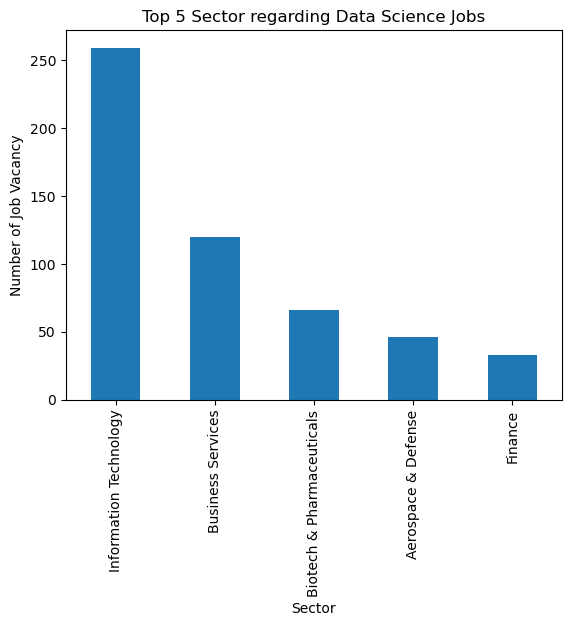

In [76]:
df["Sector"].value_counts().sort_values(ascending=False).head(5).plot.bar()
#plt.figure(figsize=(10, 6))
plt.title("Top 5 Sector regarding Data Science Jobs")
plt.xlabel("Sector")
plt.ylabel("Number of Job Vacancy")
plt.savefig('Top 5 Sector regarding Data Science Jobs.png', format='png',bbox_inches='tight');
plt.show();

### 2. Analyze the distribution of job opportunities based on geographic regions

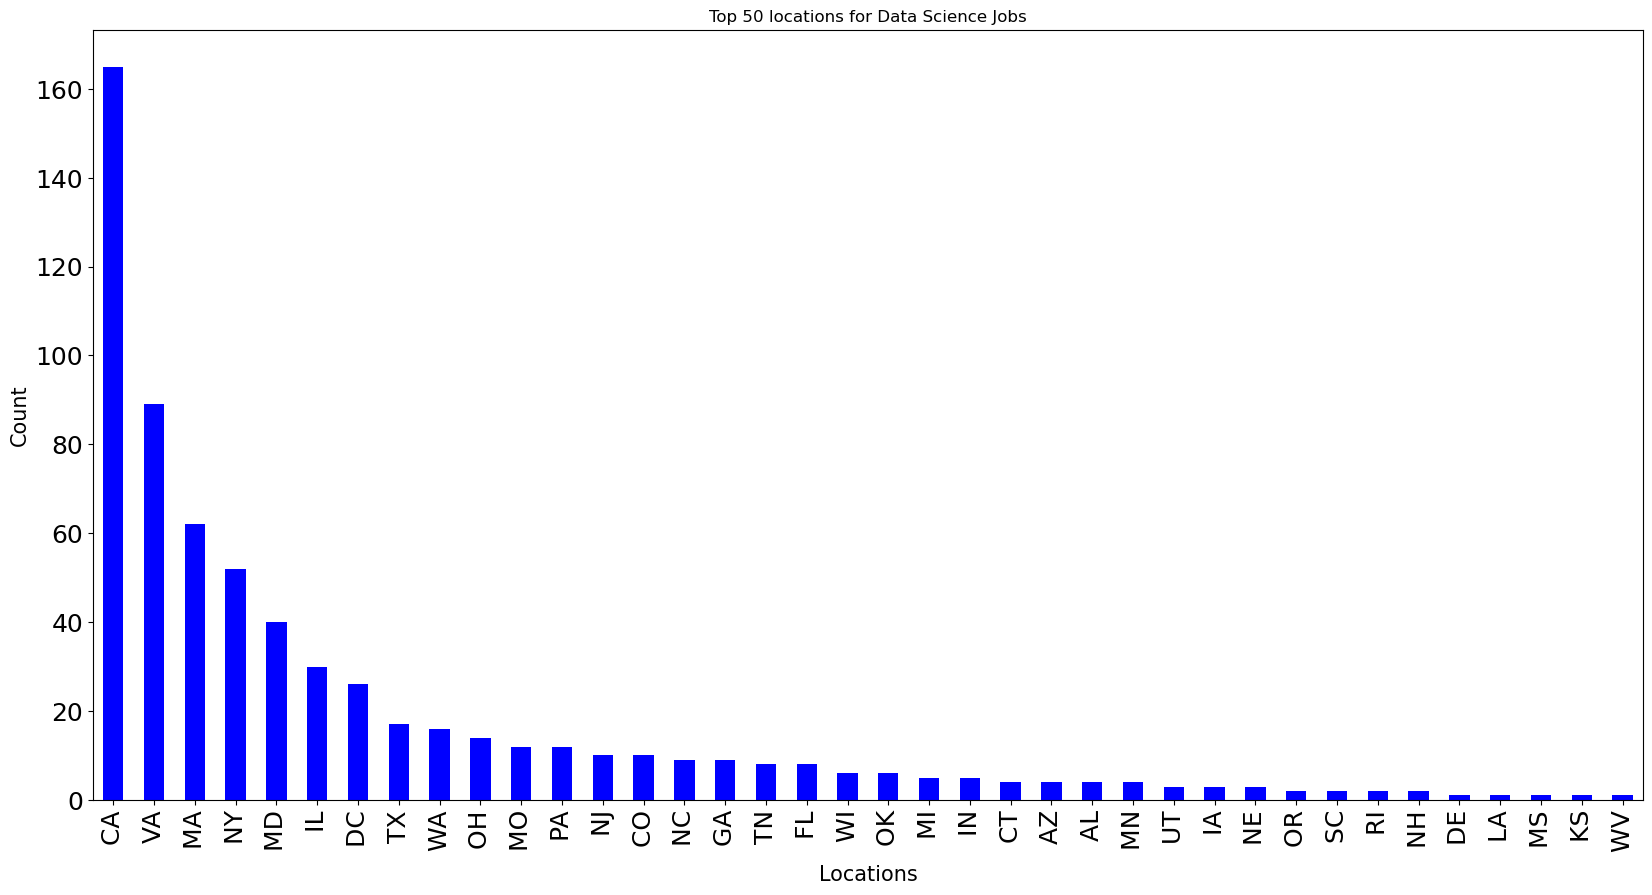

In [77]:
plt.figure(figsize = (20,10))
df["State"].value_counts().sort_values(ascending=False).plot.bar(color= "Blue", fontsize=18)
plt.title("Top 50 locations for Data Science Jobs")
plt.xlabel("Locations",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.savefig('distribution of job opportunities based on geographic regions.jpg', format='jpg',bbox_inches='tight');
plt.show()

In [78]:
df.columns

Index(['Job Title', 'Job Description', 'Company Name', 'Location',
       'Headquarters', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Competitors', 'Salary Estimate Lower Bound',
       'Salary Estimate Upper Bound', 'Average Salary Expect',
       'Size Lower Bound', 'Size Upper Bound', 'Average Size',
       'Revenue Lower Bound', 'Revenue Upper Bound', 'Average Revenue',
       'Place', 'State'],
      dtype='object')

### 3. Determine the min and max average salary range for different job positions across the industries and how the salary changes from region to region

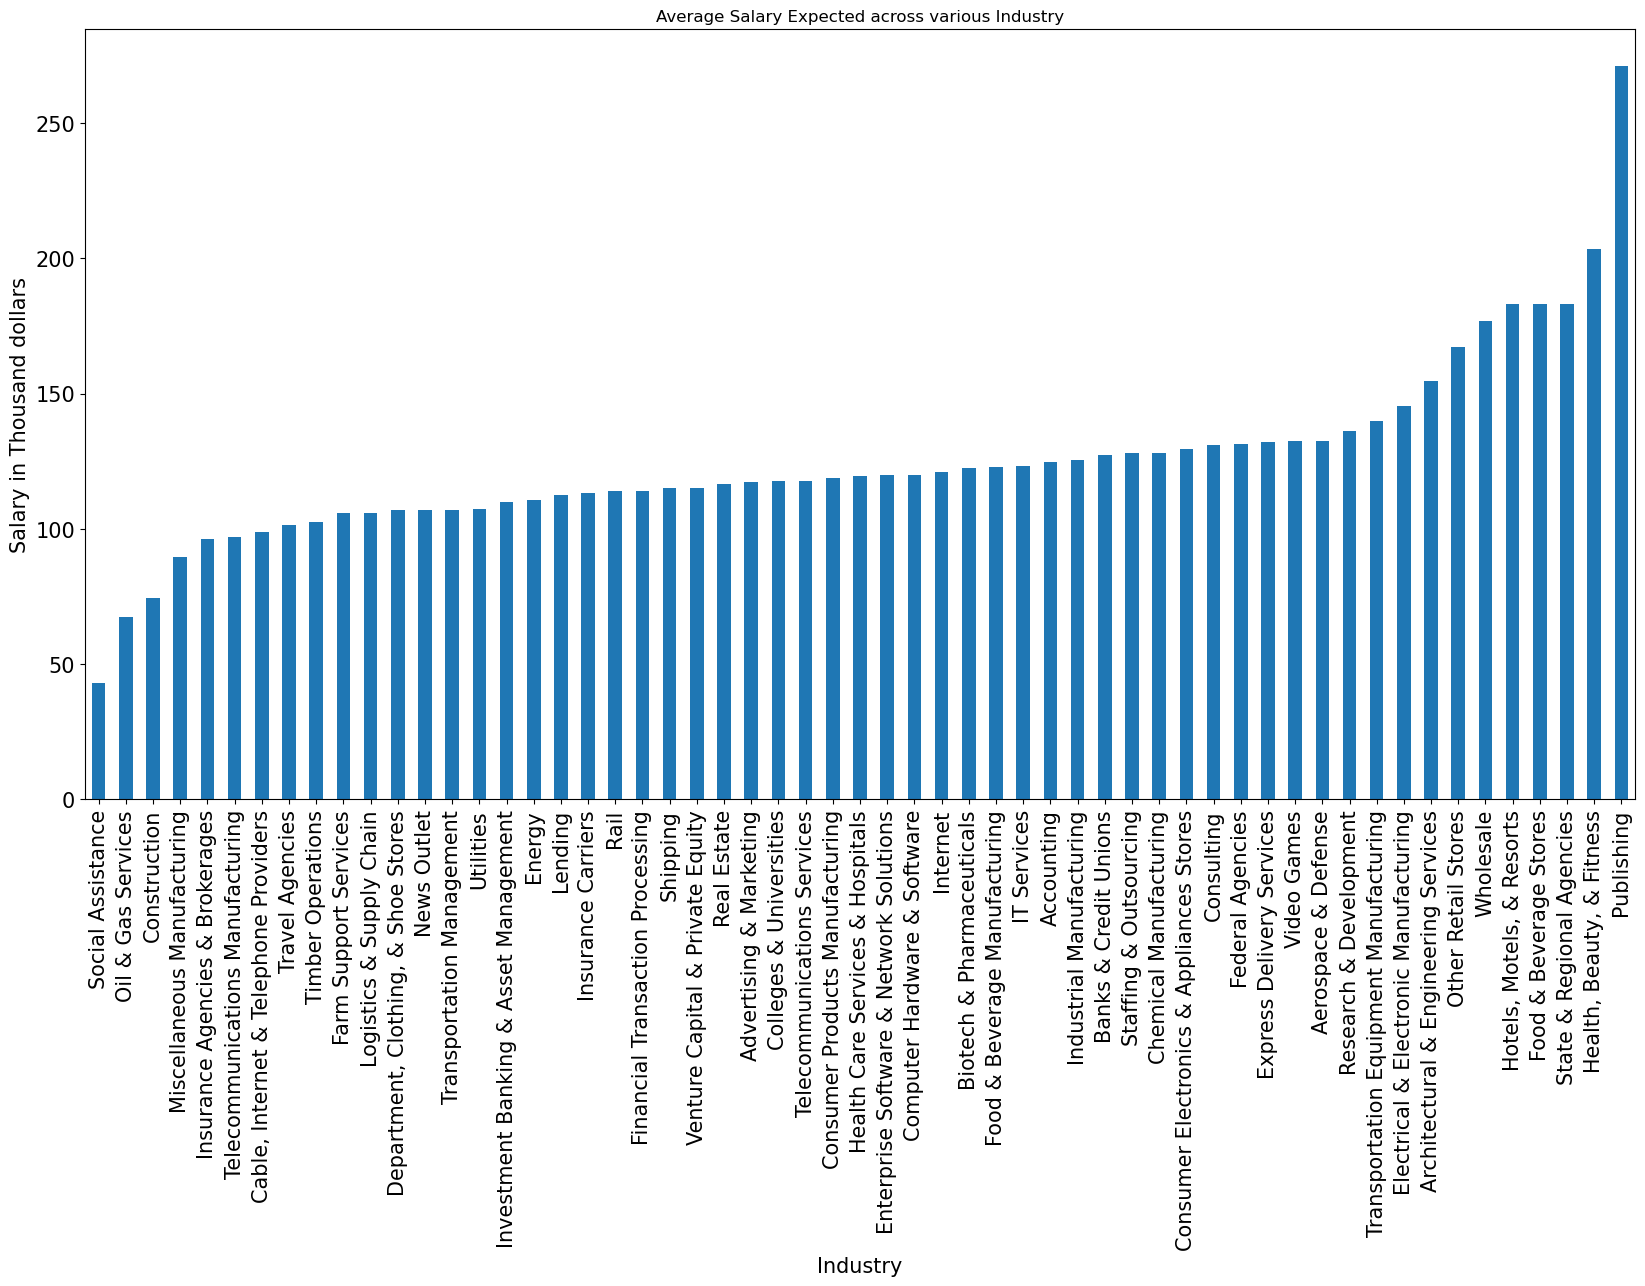

In [79]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Salary Expect'].mean()).sort_values().plot.bar(fontsize=15);
plt.ylabel("Salary in Thousand dollars",fontsize=15)
plt.xlabel("Industry",fontsize=15)
plt.title('Average Salary Expected across various Industry');

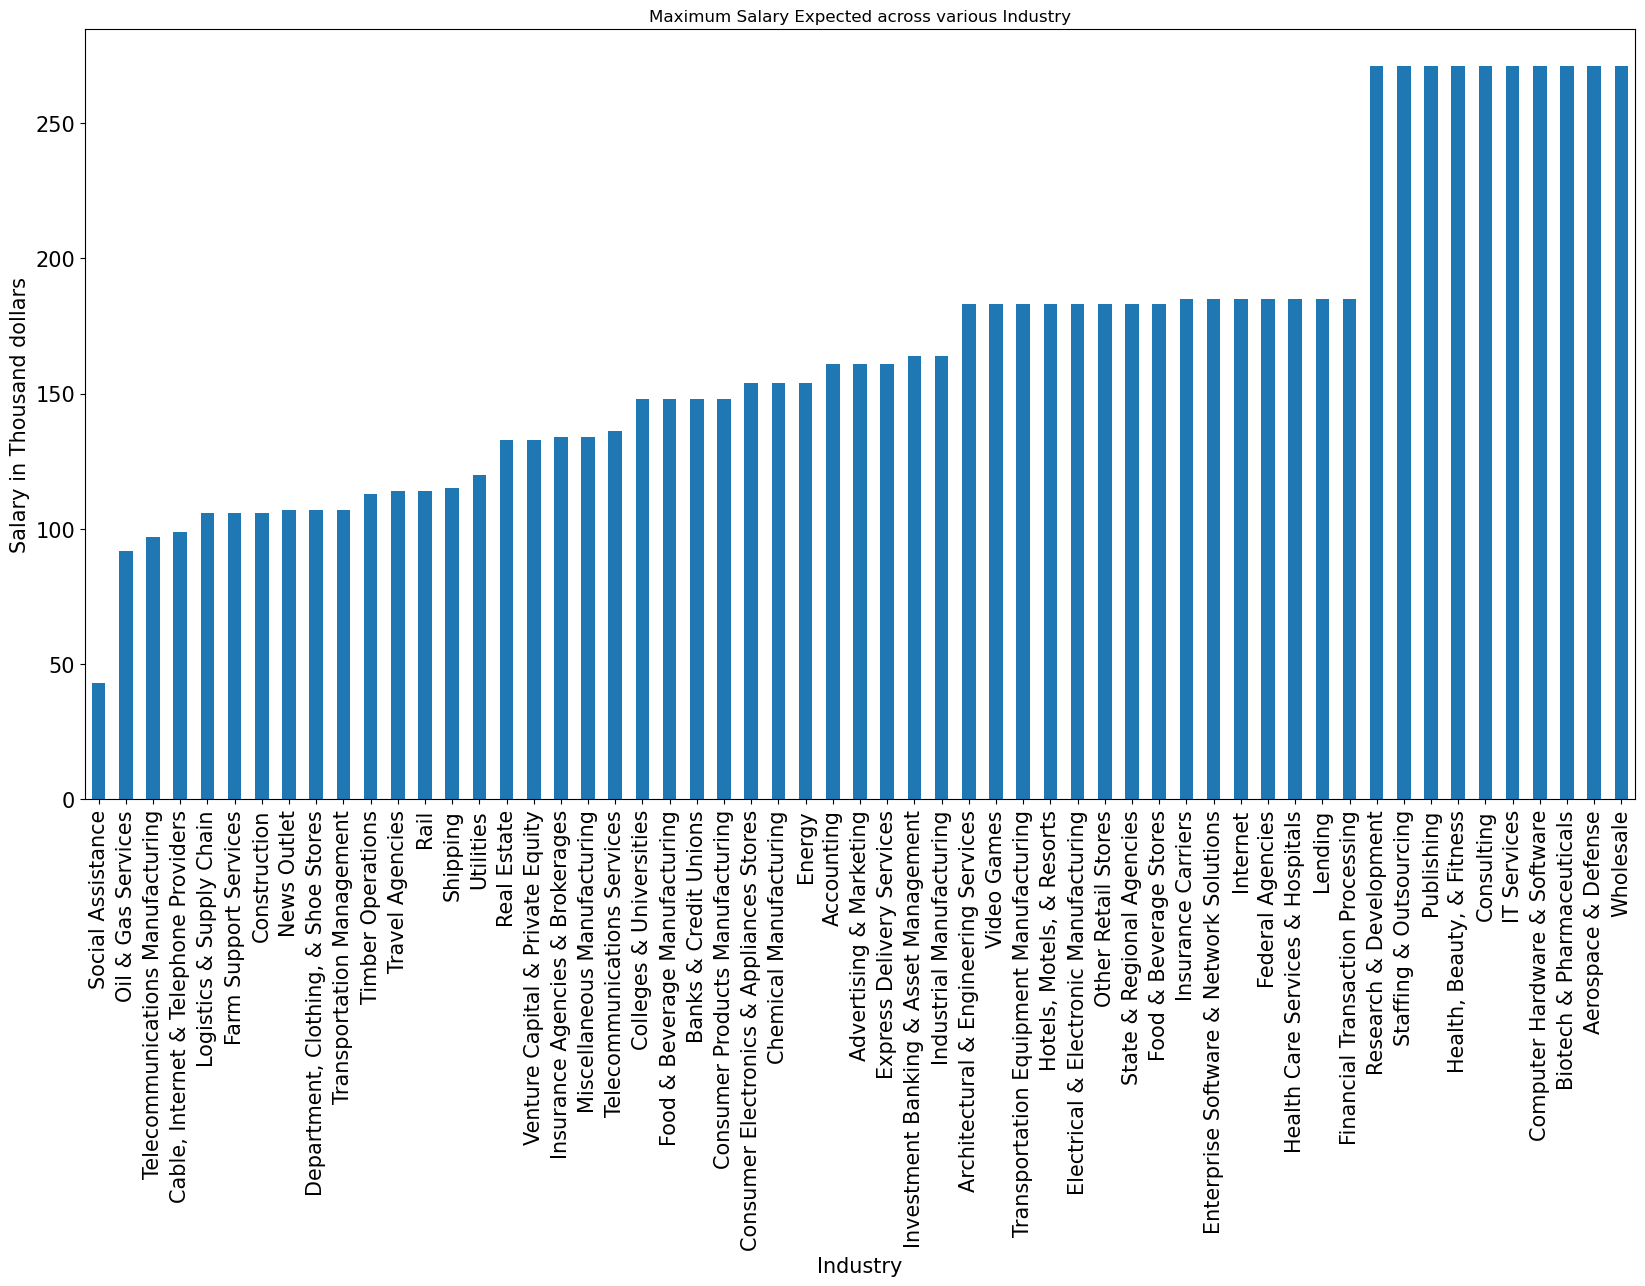

In [80]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Salary Expect'].max()).sort_values().plot.bar(fontsize=15);
plt.ylabel("Salary in Thousand dollars",fontsize=15)
plt.xlabel("Industry",fontsize=15)
plt.title('Maximum Salary Expected across various Industry');

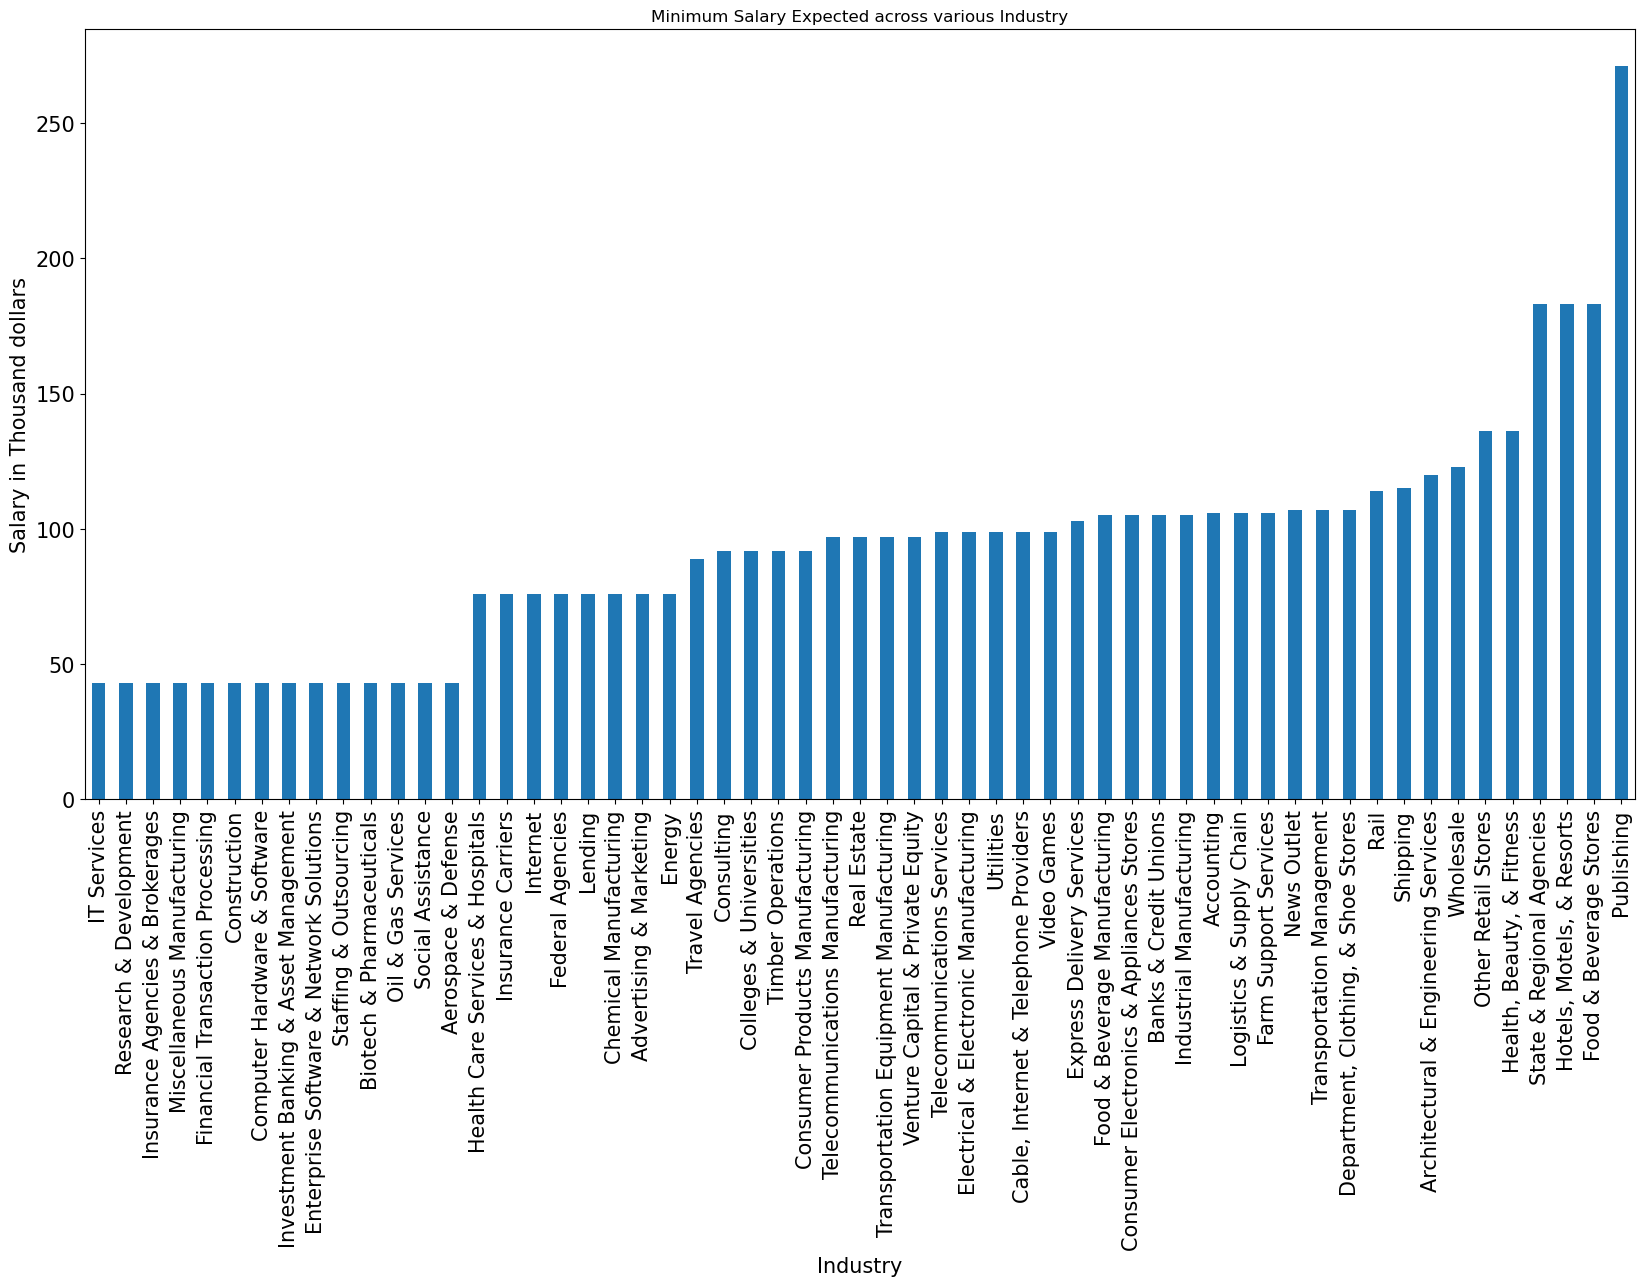

In [81]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Salary Expect'].min()).sort_values().plot.bar(fontsize=15);
plt.ylabel("Salary in Thousand dollars",fontsize=15)
plt.xlabel("Industry",fontsize=15)
plt.title('Minimum Salary Expected across various Industry');

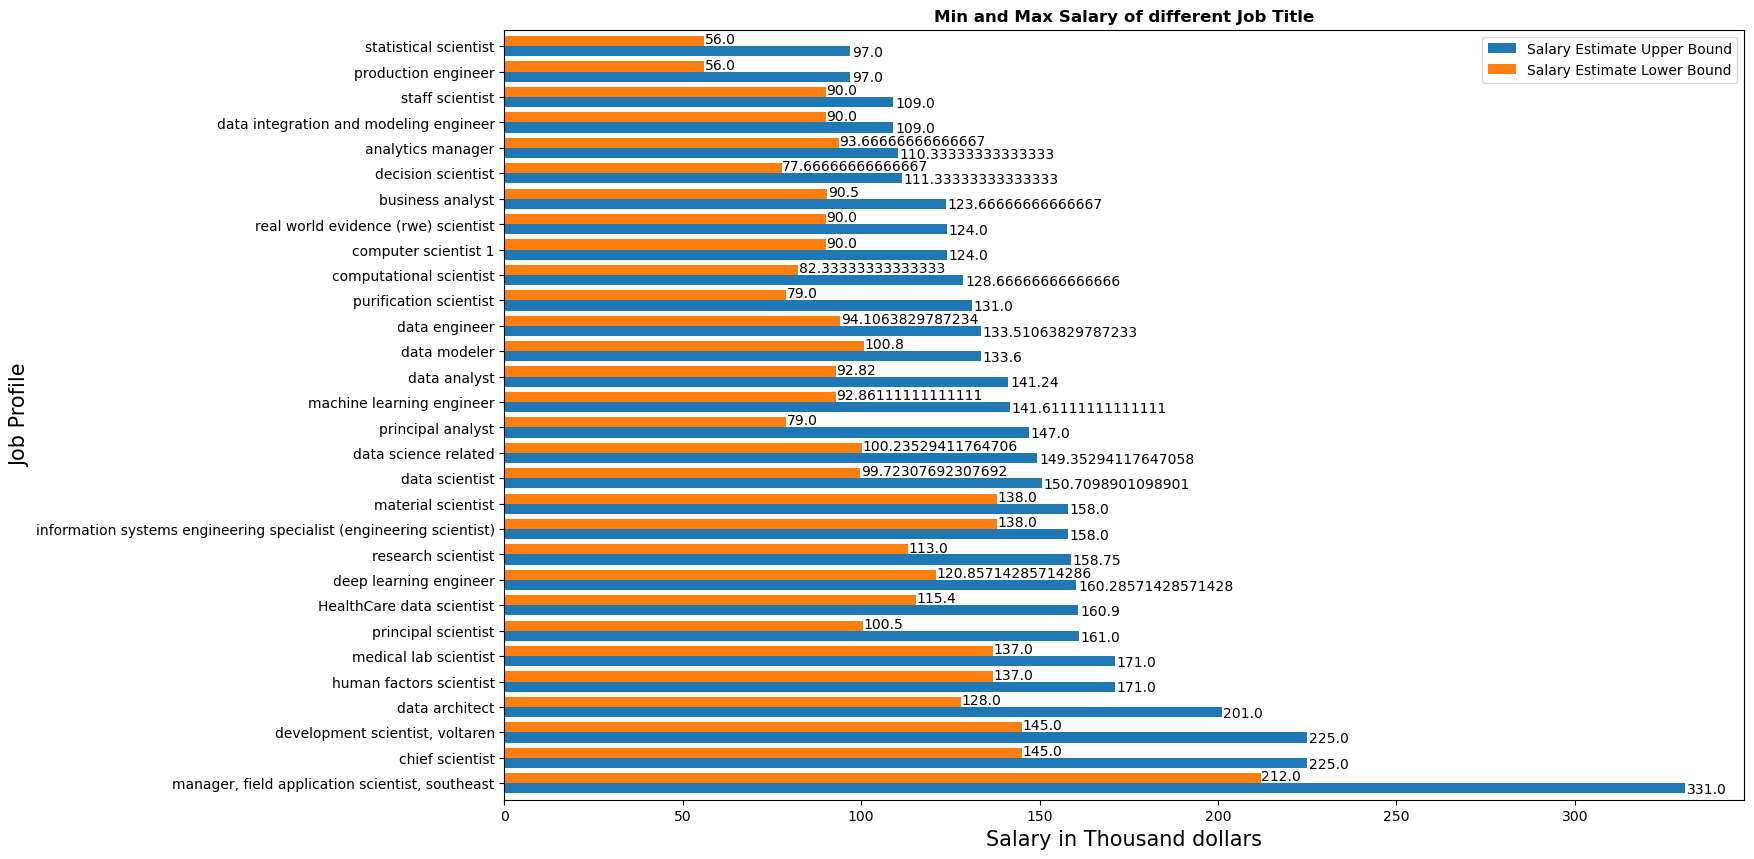

In [82]:
df_sal = df.groupby('Job Title')[['Salary Estimate Upper Bound','Salary Estimate Lower Bound']].mean().sort_values(['Salary Estimate Upper Bound','Salary Estimate Lower Bound'],ascending=False)[:30]
df_sal.plot(kind="barh", figsize=(16,10), width=0.8)
plt.ylabel("Job Title")
plt.xlabel("Salary")
plt.title("Min and Max Salary of different Job Title", fontweight="bold")

for index, value in enumerate(df_sal["Salary Estimate Upper Bound"]):
    plt.text(value + 0.5, index - 0.4, str(value))
    
    
for index, value in enumerate(df_sal["Salary Estimate Lower Bound"]):
    plt.text(value + 0.2, index + 0.1, str(value))
plt.ylabel("Job Profile",fontsize=15)
plt.xlabel("Salary in Thousand dollars",fontsize=15)
plt.savefig('min and max average salary range for different job positions.png', format='png',bbox_inches='tight');

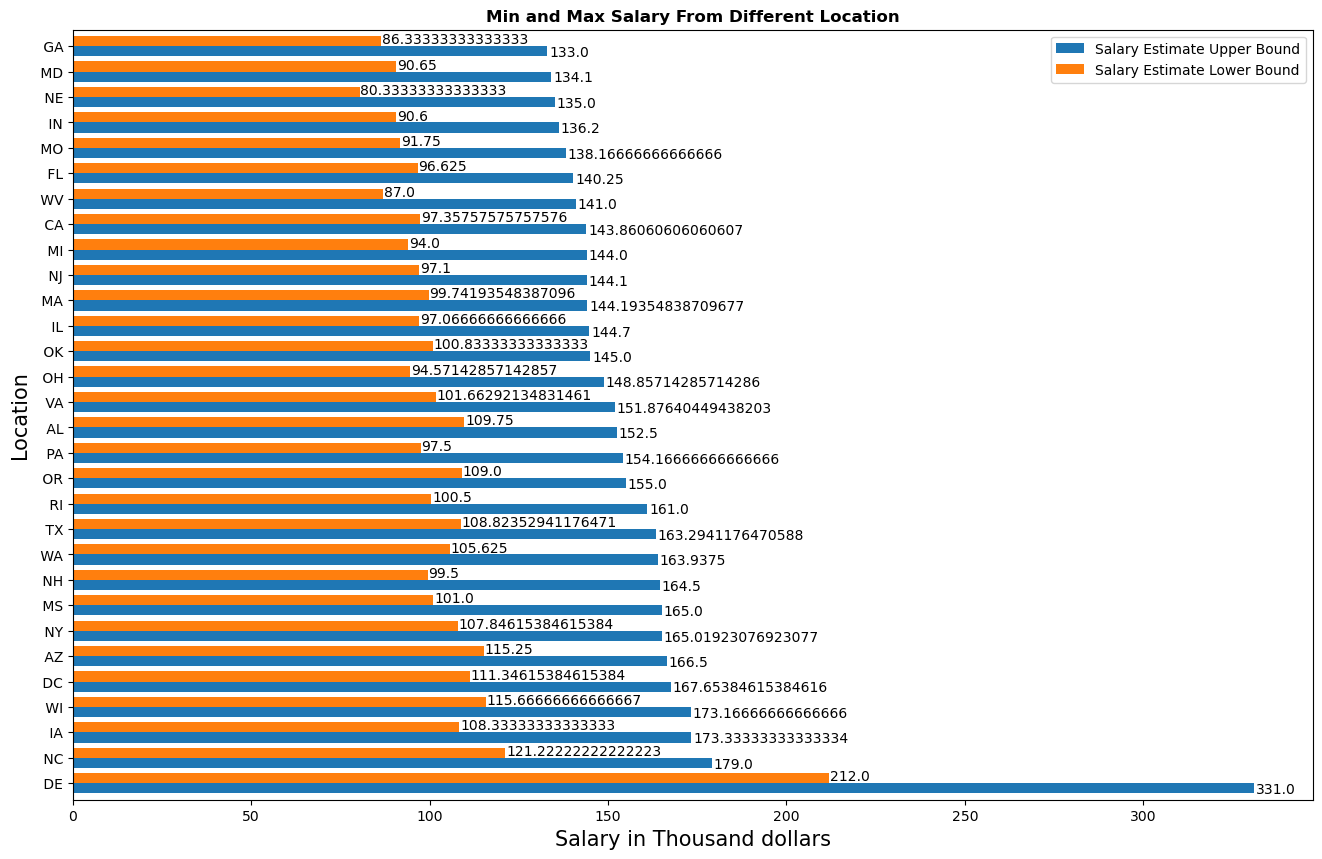

In [84]:
df_sal = df.groupby('State')[['Salary Estimate Upper Bound','Salary Estimate Lower Bound']].mean().sort_values(['Salary Estimate Upper Bound','Salary Estimate Lower Bound'],ascending=False)[0:30]
df_sal.plot(kind="barh", figsize=(16,10), width=0.8)
plt.ylabel("Location")
plt.xlabel("Salary")
plt.title("Min and Max Salary From Different Location", fontweight="bold")

for index, value in enumerate(df_sal["Salary Estimate Upper Bound"]):
    plt.text(value + 0.5, index - 0.4, str(value))
    
    
for index, value in enumerate(df_sal["Salary Estimate Lower Bound"]):
    plt.text(value + 0.2, index + 0.1, str(value))
    
plt.ylabel("Location",fontsize=15)
plt.xlabel("Salary in Thousand dollars",fontsize=15)
plt.savefig('min and max average salary range based on location.png', format='png',bbox_inches='tight');

### 9. Revenue is a key indicator of a company's financial performance.

In [85]:
#df.groupby('Industry')['Revenue Upper Bound'].mean().sort_values(ascending=False)

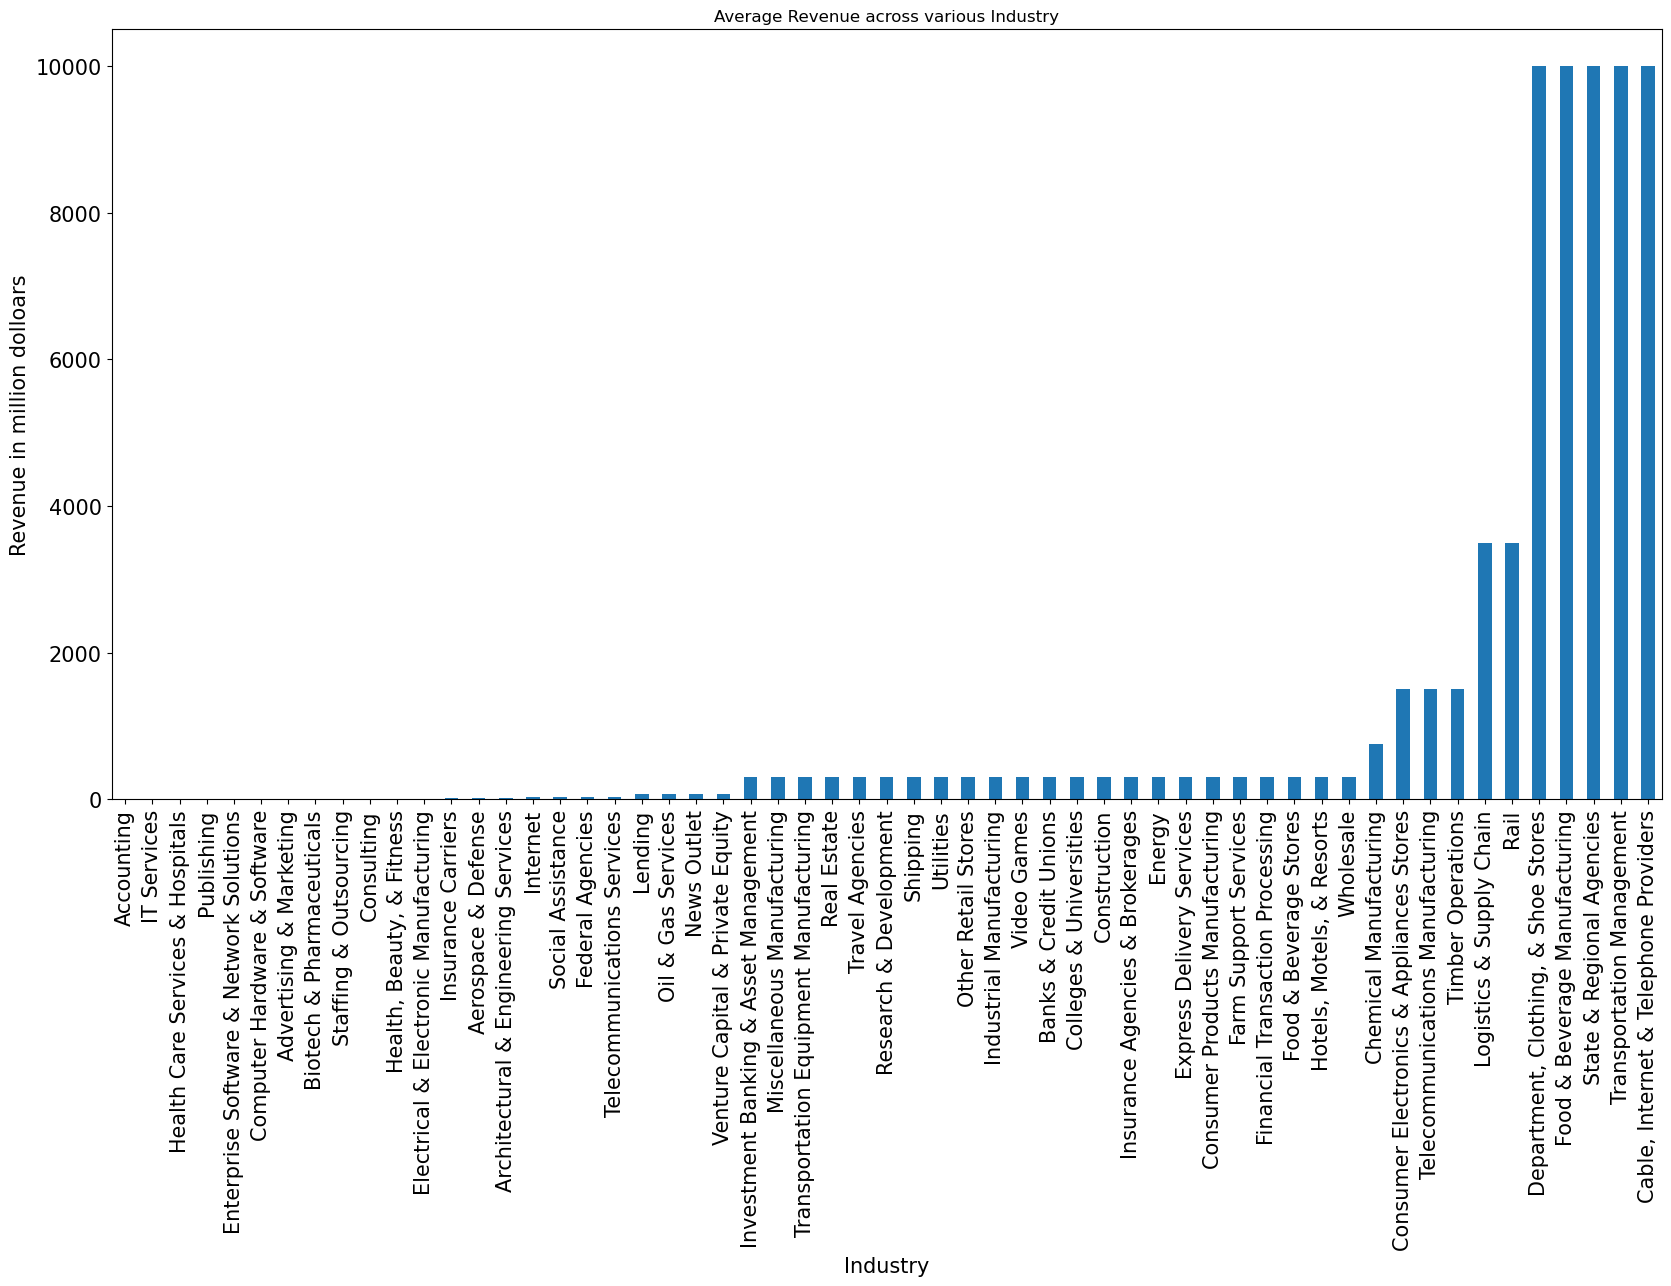

In [101]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Revenue'].min()).sort_values().plot.bar(fontsize=15);
plt.title('Average Revenue across various Industry');
plt.ylabel("Revenue in million dolloars",fontsize=15)
plt.xlabel("Industry",fontsize=15)
plt.savefig('minimum revenue regarding industry.png', format='png',bbox_inches='tight');

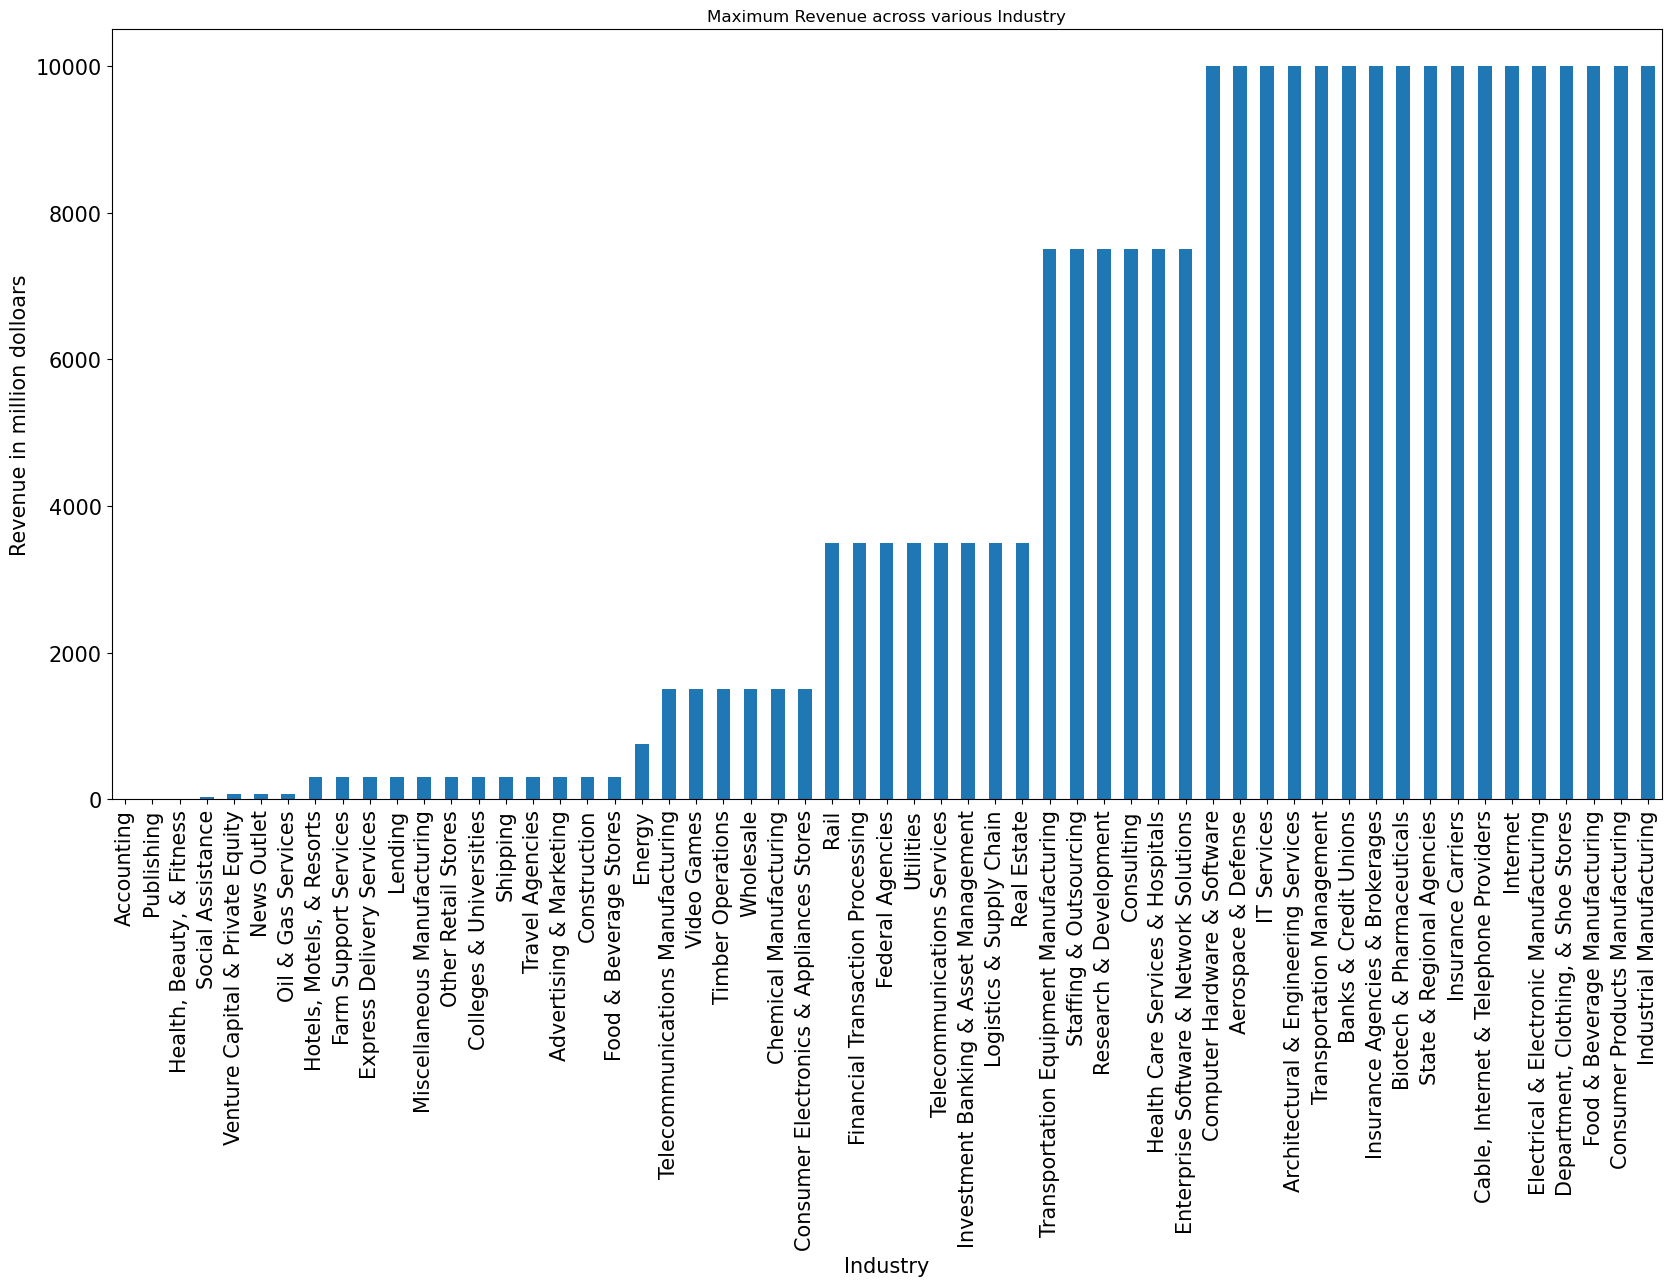

In [102]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Revenue'].max()).sort_values().plot.bar(fontsize=15);
plt.title('Maximum Revenue across various Industry');
plt.ylabel("Revenue in million dolloars",fontsize=15)
plt.xlabel("Industry",fontsize=15)
plt.savefig('Maximum revenue regarding industry.png', format='png',bbox_inches='tight');

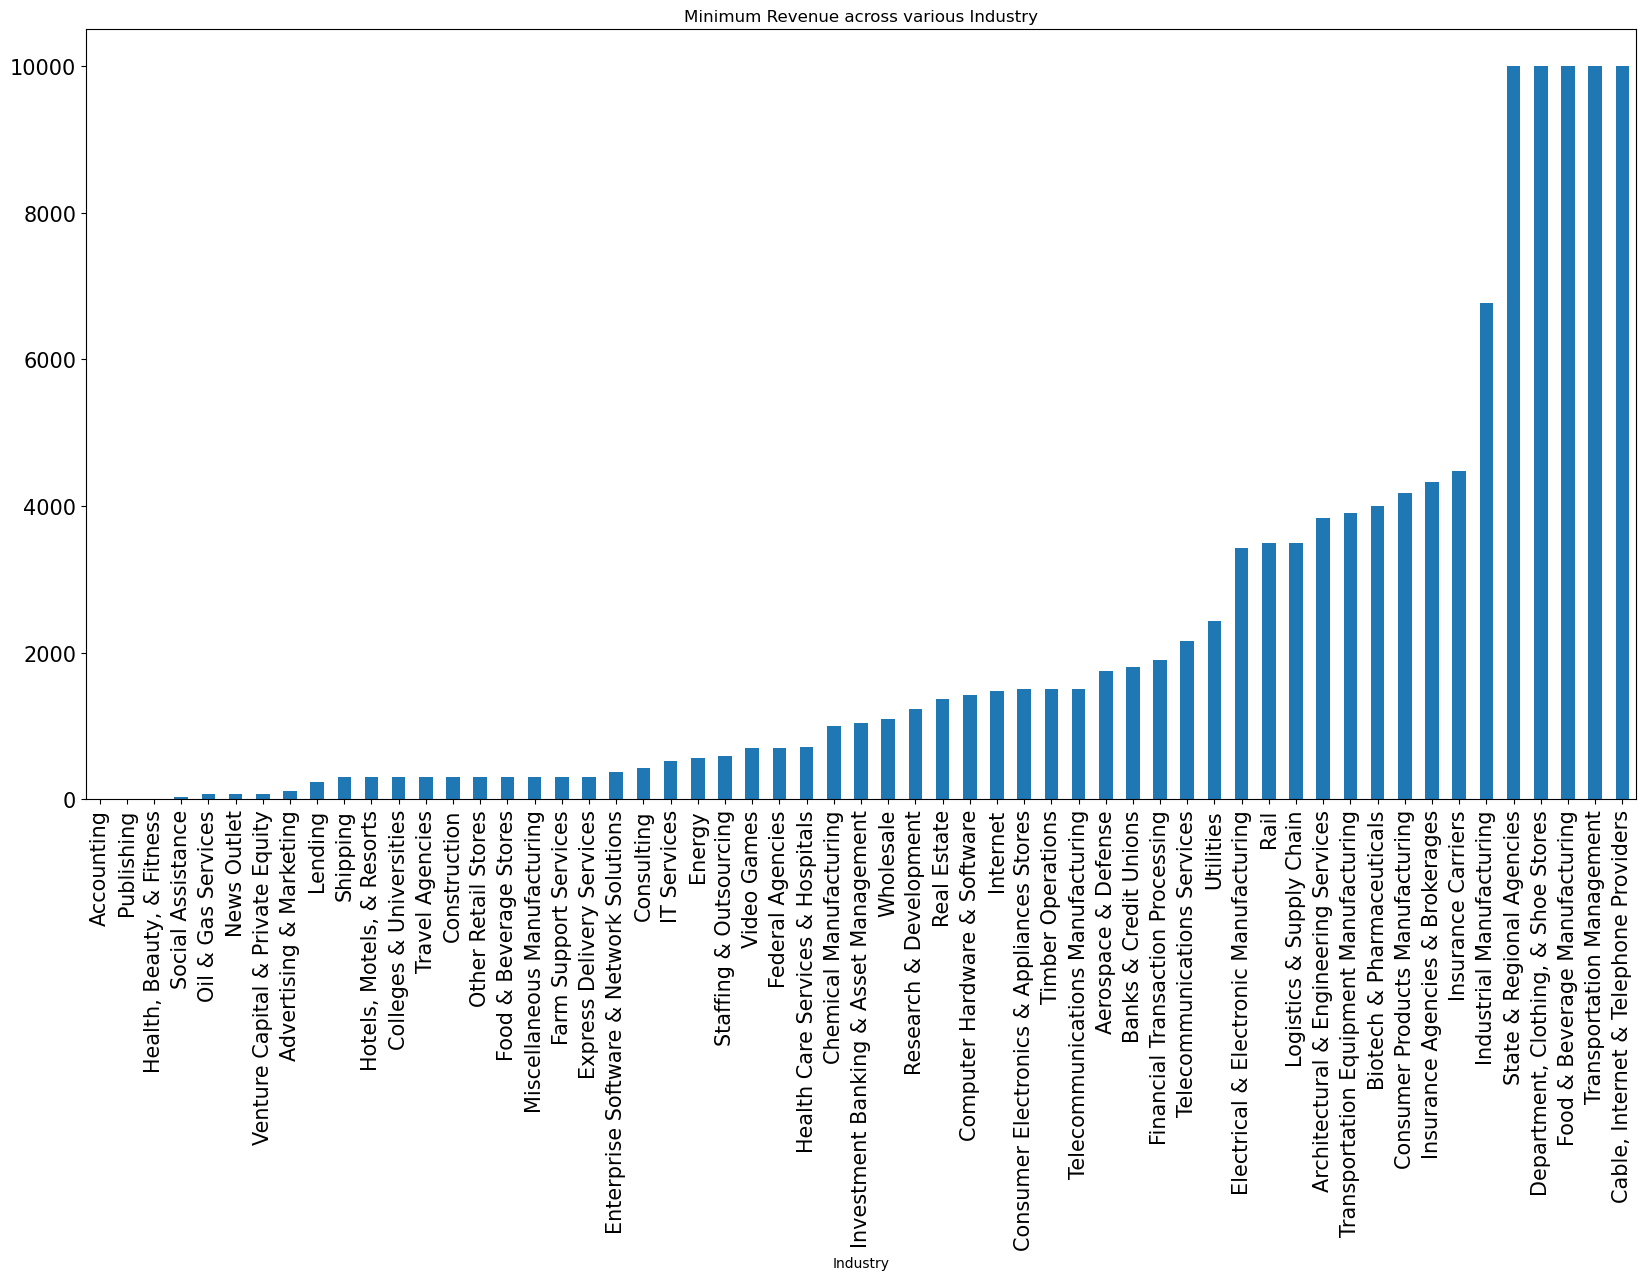

In [103]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Revenue'].mean()).sort_values().plot.bar(fontsize=15);
plt.title('Minimum Revenue across various Industry');

### 10. Having more employees means a greater pool of ideas and insights, fostering a culture of creativity and innovation within the organization. So give the view about startups, medium firms and big firms

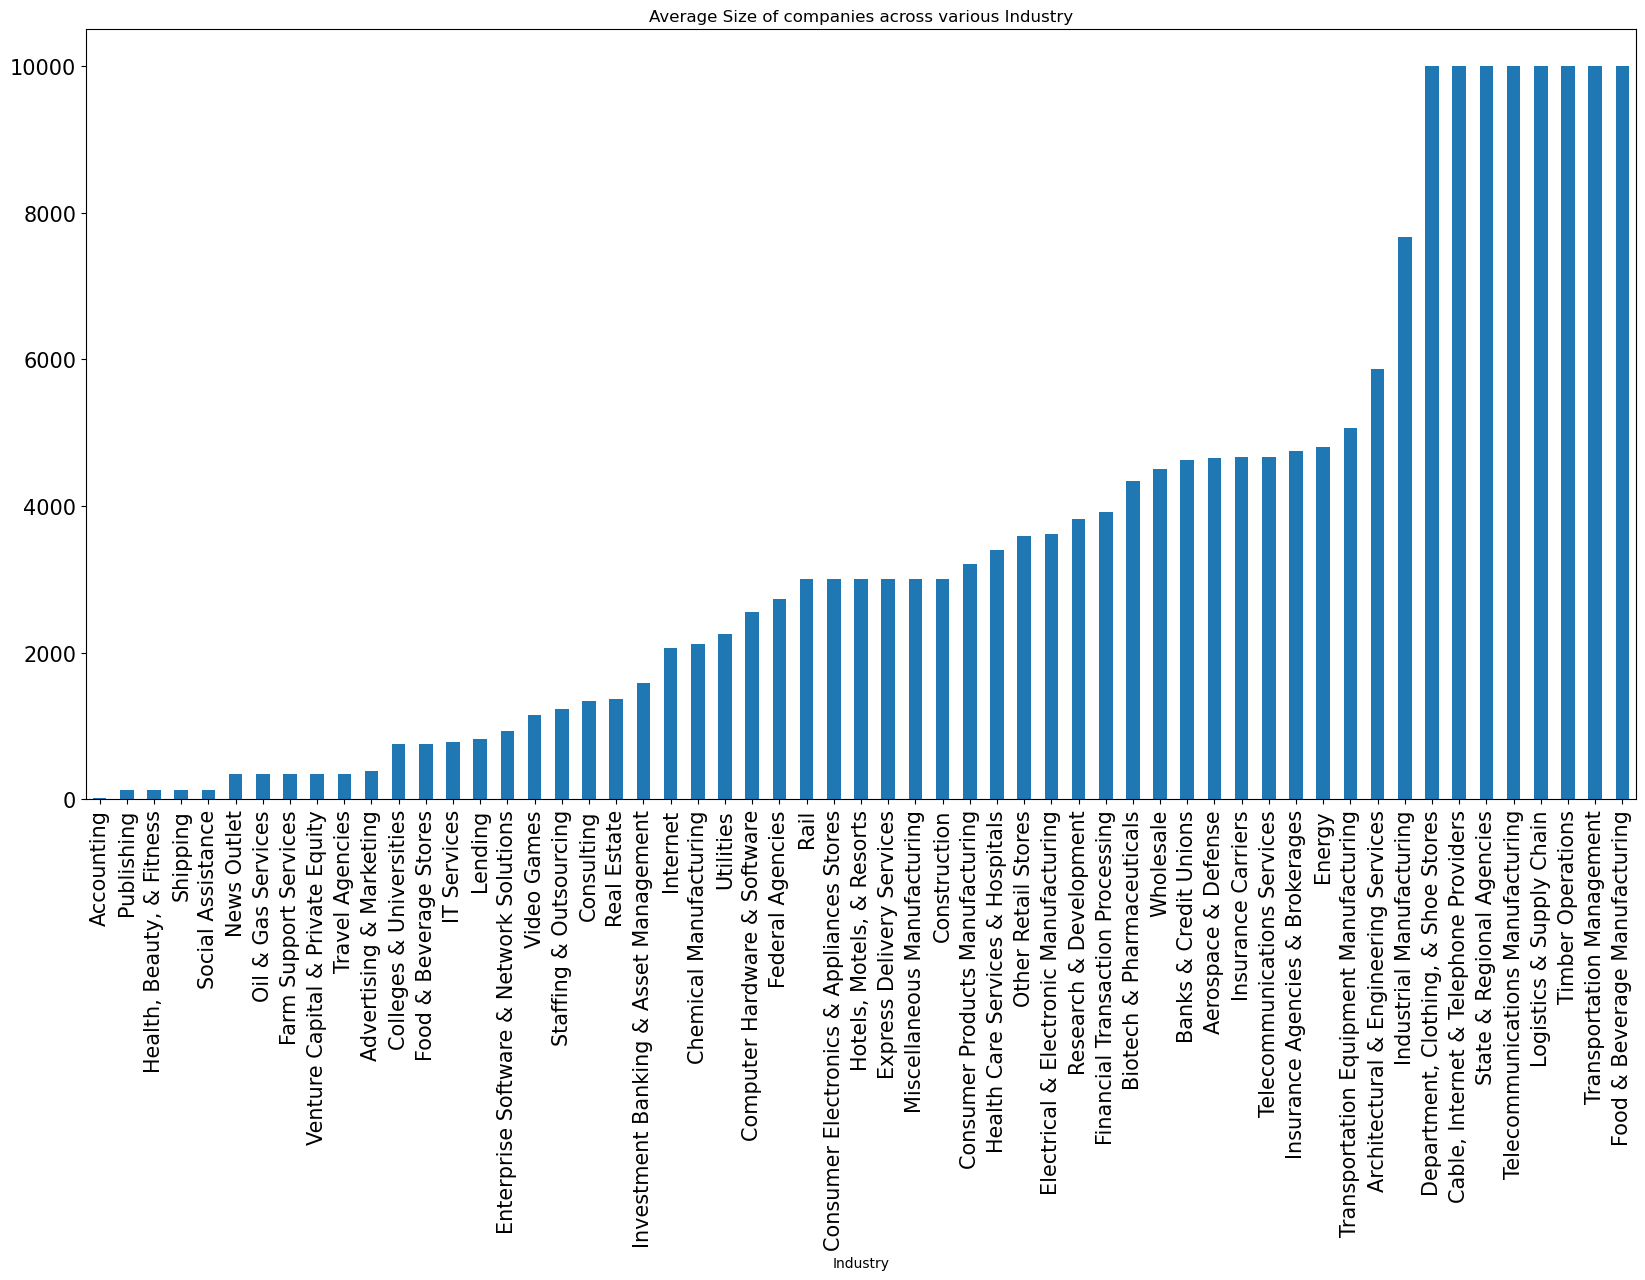

In [89]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Size'].mean()).sort_values().plot.bar(fontsize=15);
plt.title('Average Size of companies across various Industry');

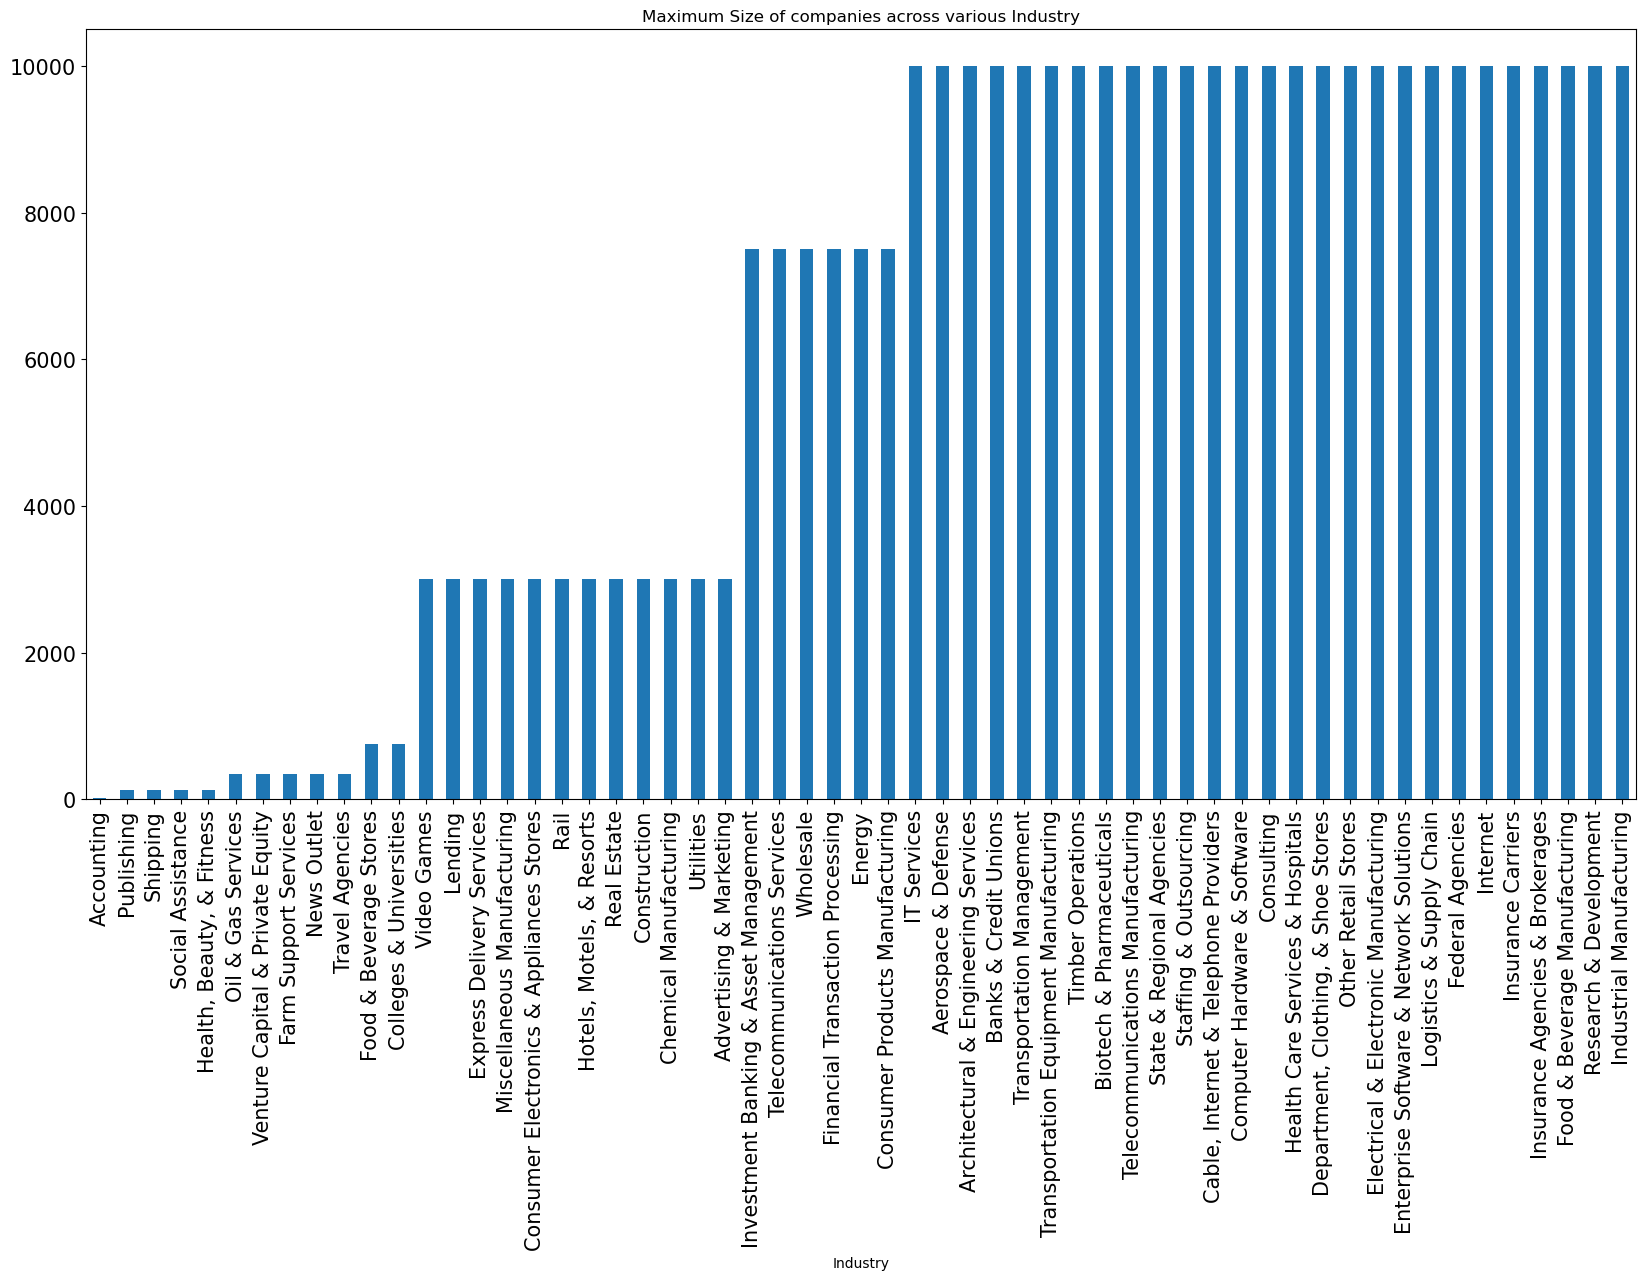

In [90]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Size'].max()).sort_values().plot.bar(fontsize=15);
plt.title('Maximum Size of companies across various Industry');

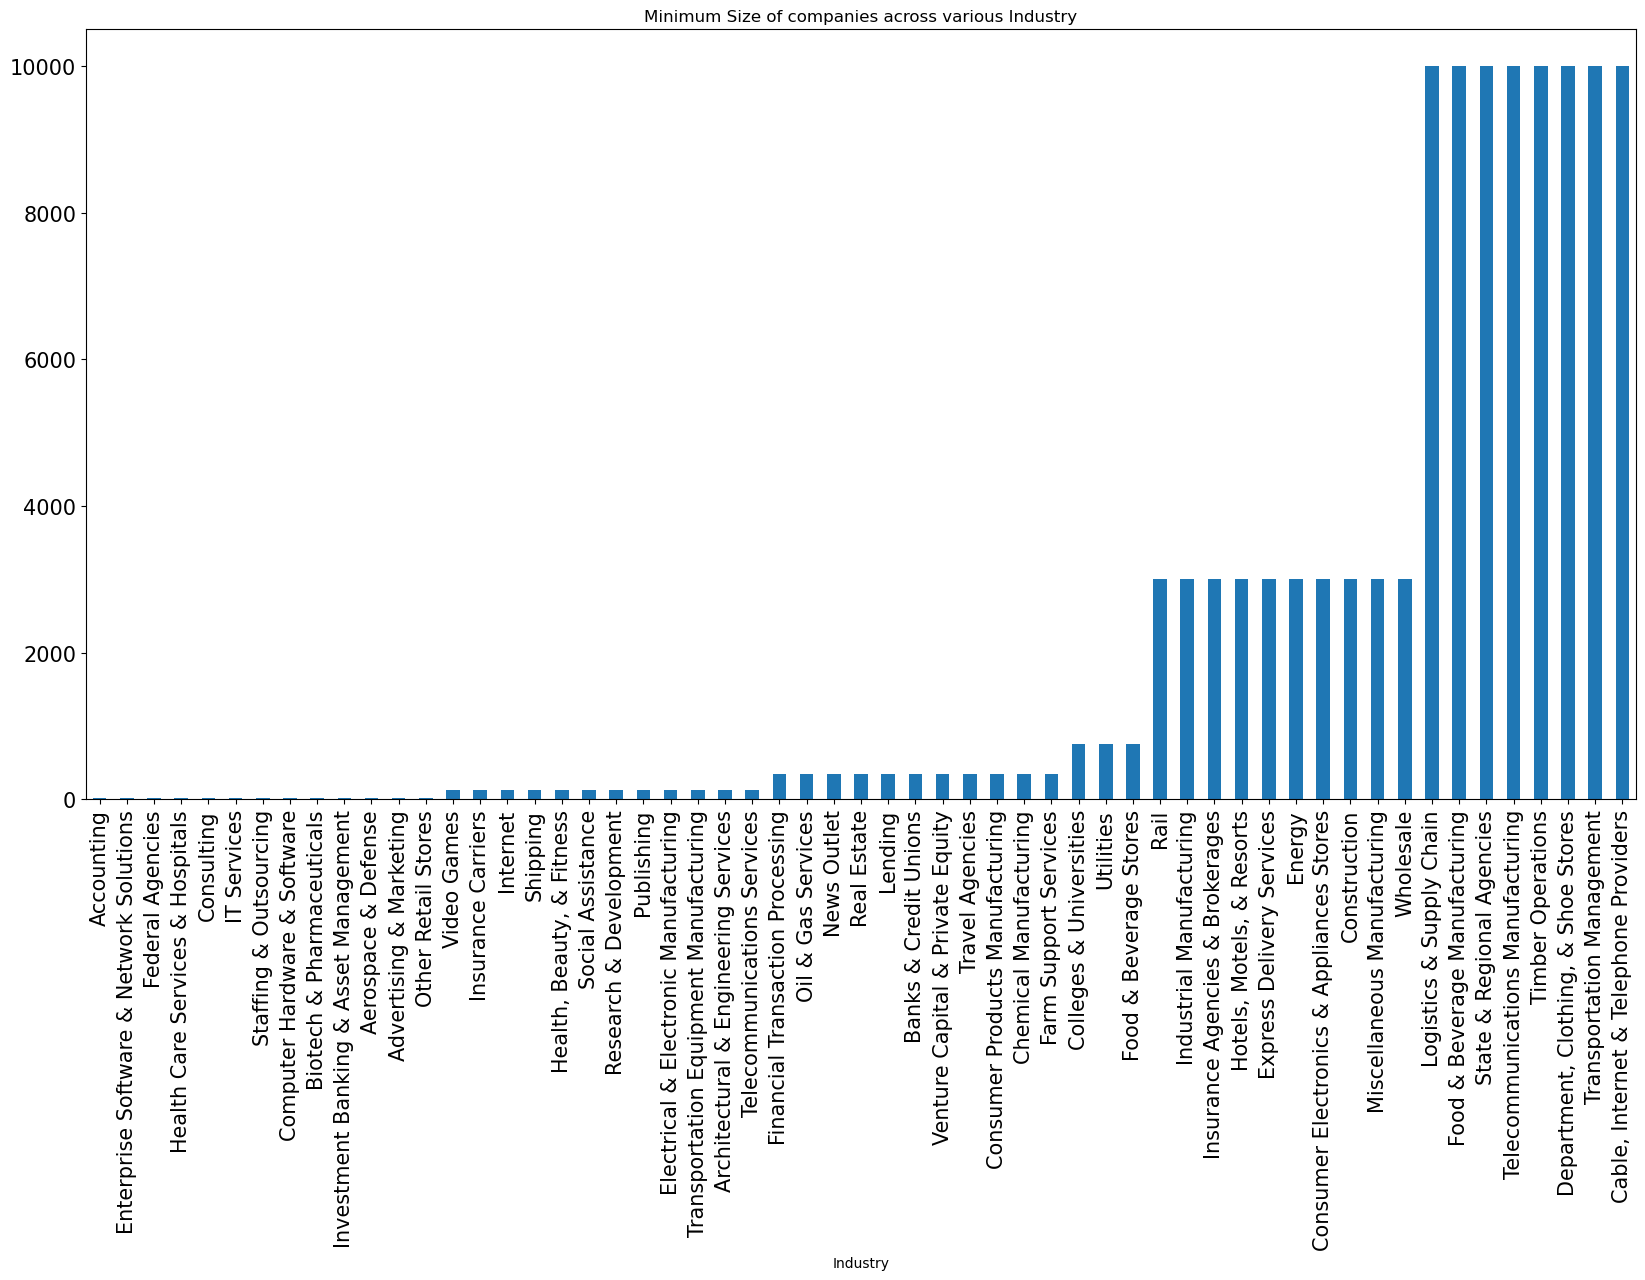

In [92]:
plt.figure(figsize = (20,10))
(df.groupby('Industry')['Average Size'].min()).sort_values().plot.bar(fontsize=15);
plt.title('Minimum Size of companies across various Industry');

### 8. Analyze the distribution of the ownership of companies

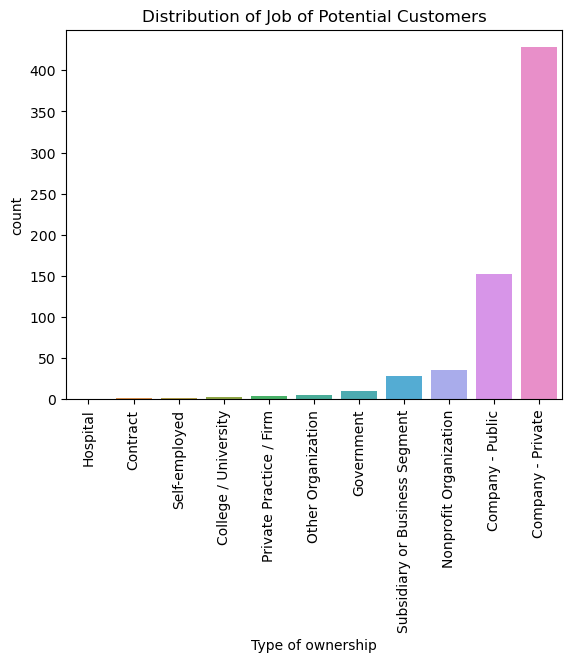

In [93]:
df01=df.groupby(["Type of ownership"])["Type of ownership"].count().to_frame()
df01.rename(columns={"Type of ownership":'count'},inplace=True)
df01=df01.sort_values(by="count").reset_index()
ax=sns.barplot(data=df01,x="Type of ownership",y="count")
ax.tick_params(axis='x',rotation=90)
ax.set_title('Distribution of Job of Potential Customers');

### 6. Provide how a candidate's years of experience in a job role have influenced

In [94]:
#a=df['Job Description'][146]
#print(a)
#print(years(a))

In [95]:
#Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous\n\nThe successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.\n\nDuties, Tasks & Responsibilities\nWorking with large, complex, and disparate data sets\nDesigning and implementing innovative ways to analyze and exploit the Sponsors data holdings\nResearching and reporting on a wide variety of Sponsor inquiries\nRaising proactive inquiries to the Sponsor based on observations and proposed data analysis/exploitation\nSolving difficult, non-routine problems by applying advanced analytical methodologies, and improving analytic methodologies\nDeveloping custom searches\nCommunicating and coordinating with internal and external partners as needed\nRequired Experience, Skills, & Technologies\n\nThorough knowledge of appropriate analytic tools and methodologies in one or more of the following:\nApplied mathematics (e.g. probability and statistics, formal modeling, computational social sciences)\nComputer programming (e.g. programming languages, math/statistics packages, computer science, machine learning, scientific computing)\nAbility to code or script in one or more general programming language\nExperience with and theoretical understanding of algorithms for classification, regression, clustering, and anomaly detection\nKnowledge of relational databases, including SQL and large-scale distributed systems (e.g. Hadoop)\nExpertise with statistical data analysis (e.g. linear models, multivariate analysis, stochastic models, sampling methods)\nDemonstrated effectiveness in collecting information and accurately representing/visualizing it to non-technical third parties\nTS/SCI with Polygraph\nBachelor of Science or equivalent and 12-15 years related experience, but will consider all levels of experience.\nDesired Experience, Skills & Technologies\nPrevious investigative experience using a combination of technical and analytic skills\n#LI-DU1\n\nManTech International Corporation, as well as its subsidiaries proactively fulfills its role as an equal opportunity employer. We do not discriminate against any employee or applicant for employment because of race, color, sex, religion, age, sexual orientation, gender identity and expression, national origin, marital status, physical or mental disability, status as a Disabled Veteran, Recently Separated Veteran, Active Duty Wartime or Campaign Badge Veteran, Armed Forces Services Medal, or any other characteristic protected by law.\n\nIf you require a reasonable accommodation to apply for a position with ManTech through its online applicant system, please contact ManTech's Corporate EEO Department at (703) 218-6000. ManTech is an affirmative action/equal opportunity employer - minorities, females, disabled and protected veterans are urged to apply. ManTech's utilization of any external recruitment or job placement agency is predicated upon its full compliance with our equal opportunity/affirmative action policies. ManTech does not accept resumes from unsolicited recruiting firms. We pay no fees for unsolicited services.\n\nIf you are a qualified individual with a disability or a disabled veteran, you have the right to request an accommodation if you are unable or limited in your ability to use or access http://www.mantech.com/careers/Pages/careers.aspx as a result of your disability. To request an accommodation please click careers@mantech.com and provide your name and contact information

In [75]:
df['Job Description']=df['Job Description'].apply(lambda x:x.lower())

In [97]:
import re
def years(x):
    pattern = r'(\d+[\s-]?(\d+)?)\s*(year|yr)'

    matches = re.findall(pattern, x)
    for match in matches:
        result = match[0]
        return(result)

    else:
        return 'Unknown'

In [76]:
import re
def year(x):
    pattern = r'\b\d+(?=\syear)'

    match = re.search(pattern, x)
    if match:
        result = match.group()
        return result
    pattern2 = r'\b\w+(?=\syear)'
    match2 = re.search(pattern2, x)
    if match2:
        result = match2.group()
        return result
    else:
        return 'Unknown'

In [77]:
df['Experience']=df['Job Description'].apply(lambda x: year(x))

In [78]:
df['Experience'].unique()

array(['Unknown', '15', 'one', '1', '2', '3', 'ten', 'several', 'league',
       '8', '10', '7', '5', 'every', '9', 'three', '4', '6', 'first',
       '20', 'a', 'owns', 'for', 'more', 'plus', '40', '12', 'seven',
       'coming', '100', 'six', 'equivalent', 'four', 'experience', '30',
       'per', '80', '50', 'profitable', 'few', '160', 'five', 'in', 'two',
       'the', 'recent', '16'], dtype=object)

In [79]:
d={'one':'1','Ten':'10','Several':'2','three':'3','Three':'3','seven':'7','six':'6','four':'4','few':'2','Five':'5','Two':'2','five':'5','two':'2'}
df['Experience'].replace(d,inplace=True)

In [80]:
df['Experience'].unique()

array(['Unknown', '15', '1', '2', '3', 'ten', 'several', 'league', '8',
       '10', '7', '5', 'every', '9', '4', '6', 'first', '20', 'a', 'owns',
       'for', 'more', 'plus', '40', '12', 'coming', '100', 'equivalent',
       'experience', '30', 'per', '80', '50', 'profitable', '160', 'in',
       'the', 'recent', '16'], dtype=object)

In [81]:
d={'Unknown':'-1','several':'-1','every':'-1','first':'-1','a':'1','owns':'-1','for':'-1','more':'-1','plus':'-1','coming':'-1','equivalent':'-1','Every':'-1','two':'2'}

df['Experience'].replace(d,inplace=True)

In [82]:
df['Experience'].unique()

array(['-1', '15', '1', '2', '3', 'ten', 'league', '8', '10', '7', '5',
       '9', '4', '6', '20', '40', '12', '100', 'experience', '30', 'per',
       '80', '50', 'profitable', '160', 'in', 'the', 'recent', '16'],
      dtype=object)

In [83]:
d={'per':'-1','profitable':'-1','in':'-1','recent':'-1','a':'1','100':'-1','160':'-1','55':'-1'}

df['Experience'].replace(d,inplace=True)

In [84]:
df['Experience'].unique()

array(['-1', '15', '1', '2', '3', 'ten', 'league', '8', '10', '7', '5',
       '9', '4', '6', '20', '40', '12', 'experience', '30', '80', '50',
       'the', '16'], dtype=object)

In [85]:
df['Experience'].replace('the','-1',inplace=True)

In [86]:
df['Experience'].unique()

array(['-1', '15', '1', '2', '3', 'ten', 'league', '8', '10', '7', '5',
       '9', '4', '6', '20', '40', '12', 'experience', '30', '80', '50',
       '16'], dtype=object)

In [87]:
df['Experience'].value_counts()

-1            379
5              67
3              58
2              47
8              23
1              18
4              15
10             14
7              12
6              10
15              4
ten             4
20              4
40              4
12              3
50              3
league          2
80              1
9               1
30              1
experience      1
16              1
Name: Experience, dtype: int64

In [88]:
d={'ten':10,'league':'-1','in':'-1','experience':'-1'}

df['Experience'].replace(d,inplace=True)

In [89]:
df["Experience"] = df["Experience"].apply(lambda x:int(x))

In [90]:
df["Experience"].unique()

array([-1, 15,  1,  2,  3, 10,  8,  7,  5,  9,  4,  6, 20, 40, 12, 30, 80,
       50, 16], dtype=int64)

In [114]:
#df["Experience"]=df["Experience"].replace(-1,np.nan,inplace=True)

Text(0.5, 0, 'Salary in Thousand dollars')

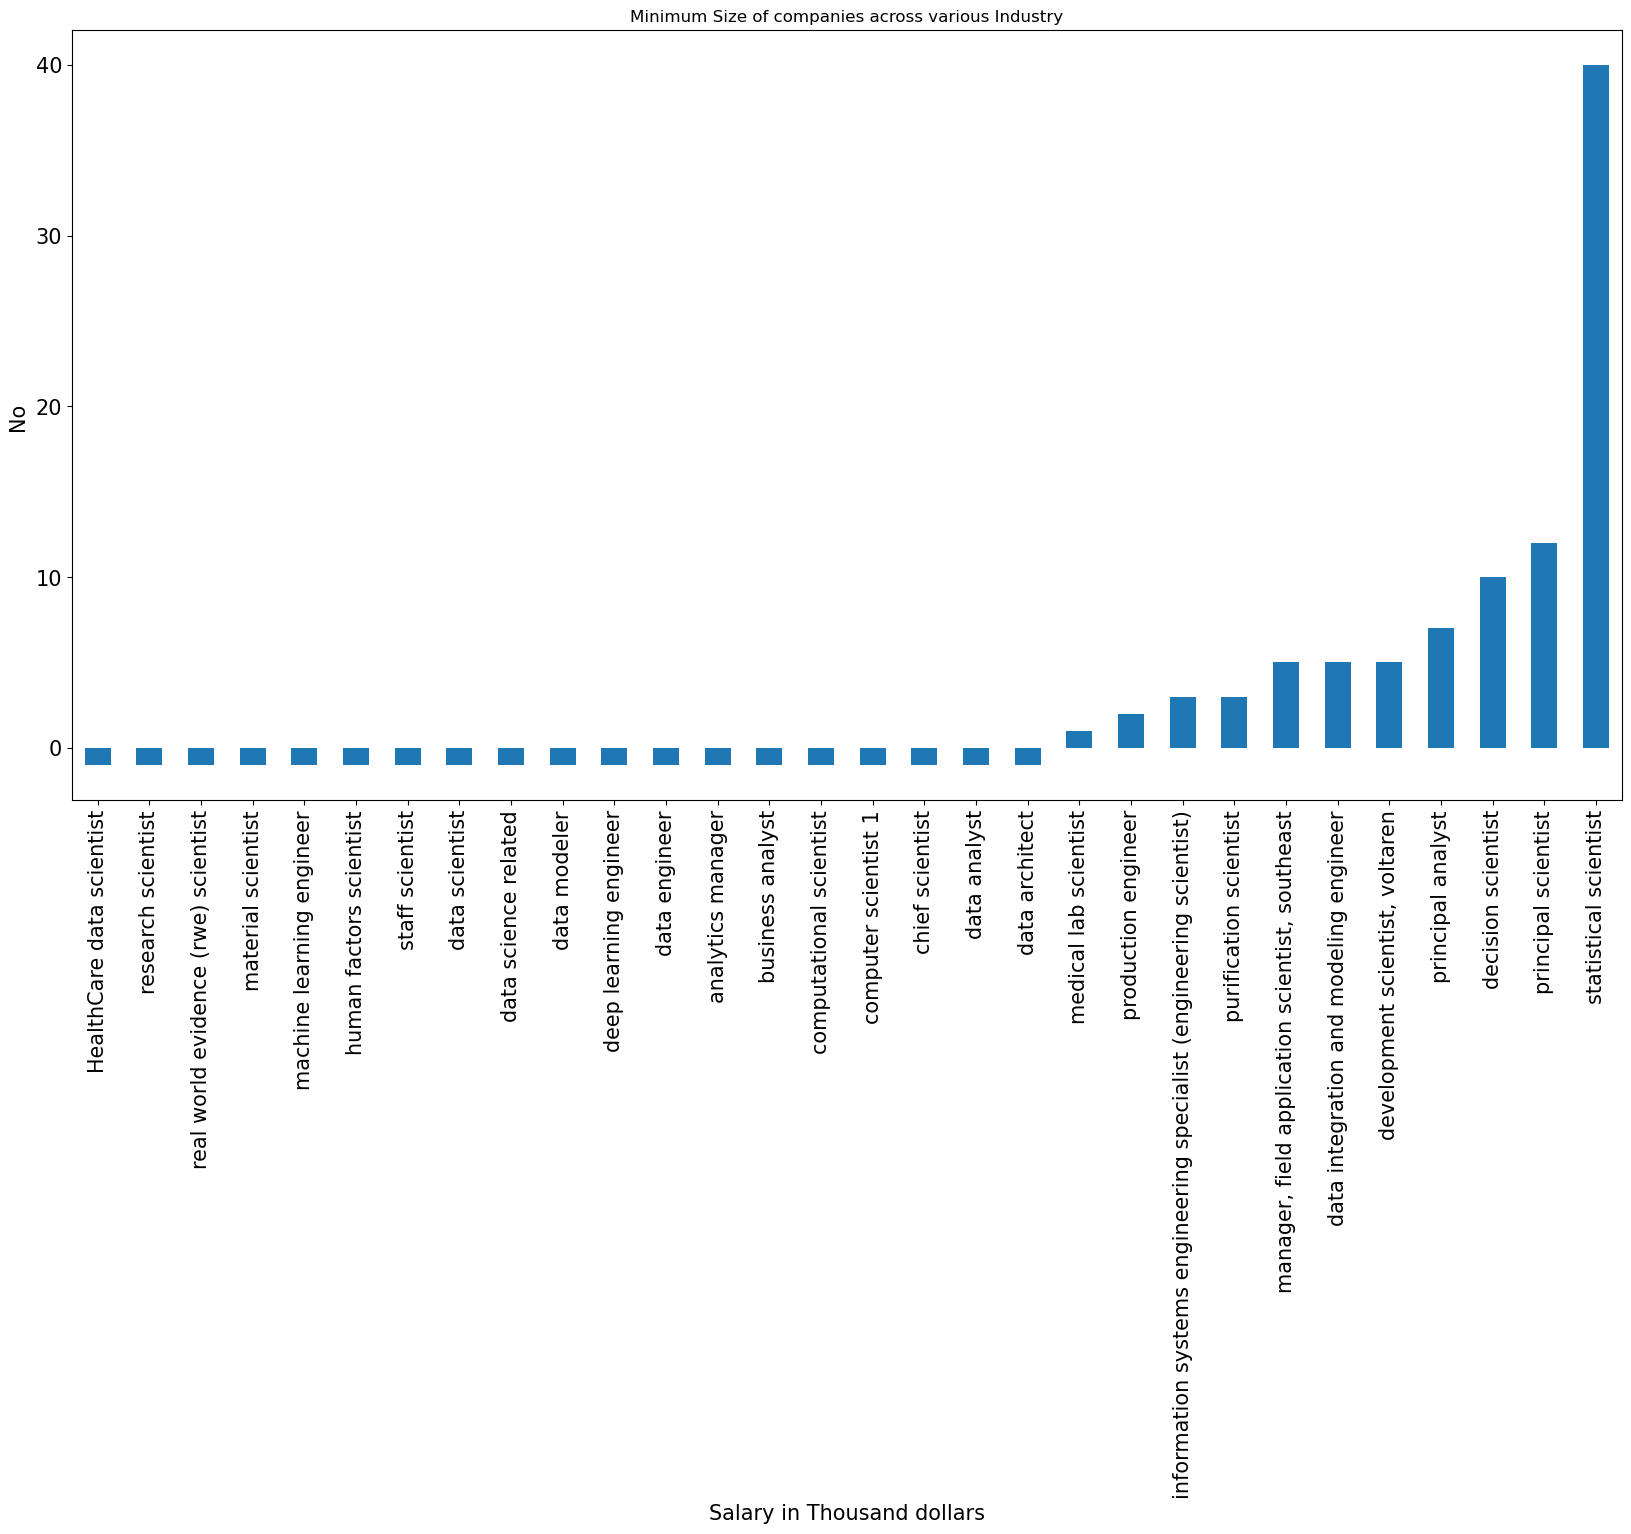

In [92]:
plt.figure(figsize = (20,10))
(df.groupby('Job Title')['Experience'].min()).sort_values().plot.bar(fontsize=15);
plt.title('Minimum Size of companies across various Industry');
plt.ylabel("Minimum number of experience ",fontsize=15)
plt.xlabel("Job title",fontsize=15)
plt.savefig('Job title based on minimum number of experience.png', format='png',bbox_inches='tight');

### Determine the most in-demand skills across industries and highlight emerging skill trends.

In [94]:
skills = ["machine learning","regression","stat","numpy","pandas","data visualization","data analysis","time series","data cleaning","deep learning",
          "python","c++","java","matlab",".net","c#","javascript","html","bash","big data","hadoop","spark","impala","cassandra","kafka","hdfs","hbase","hive",
        "aws","gcp","azure","s3","redshift","ec2","lambda","route s3","dynamo db","sql","mongo db","excel","sas","nosql","communication"]
job = df["Job Description"].tolist()

In [95]:
job = [x.lower() for x in job]

In [96]:
from collections import defaultdict
skills_required = defaultdict()
for item in skills:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    skills_required[item] = counter

skills_df = pd.DataFrame(list(skills_required.items()),columns = ['skills','count']) 
skills_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

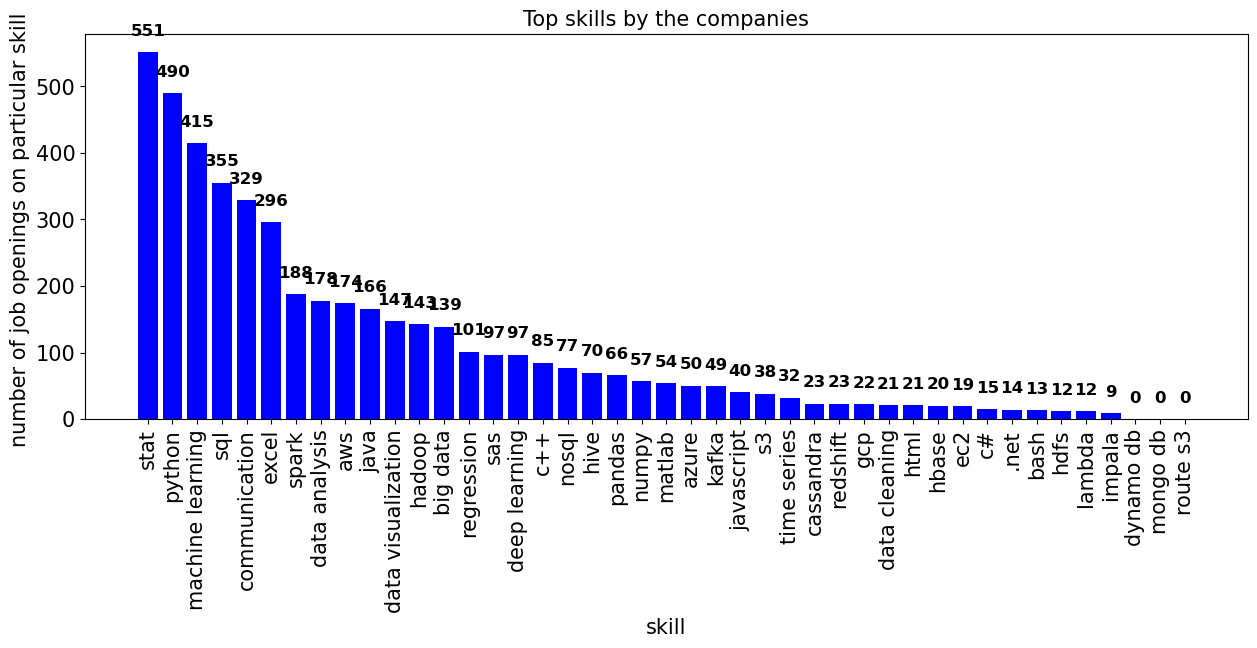

In [97]:
plt.figure(figsize = (15,5))
x = skills_df["skills"]
y = skills_df["count"]
plt.bar(x,y,color= "blue")
plt.title("Top skills by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in skills_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');
    
plt.ylabel("number of job openings on particular skill ",fontsize=15)
plt.xlabel("skill",fontsize=15)
plt.savefig('job openings on based on skills.png', format='png',bbox_inches='tight');

### 8. find out academic qualifications preferred by companies and distribution of them

In [98]:
education = ["experience","bs","ms","phd","full-time","intern","remote","master","doctorate","computer science","bachelor"]

In [99]:
exp_edu_required = defaultdict()
for item in education:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    exp_edu_required[item] = counter
    
exp_edu_df = pd.DataFrame(list(exp_edu_required.items()),columns = ['Education','count']) 
exp_edu_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

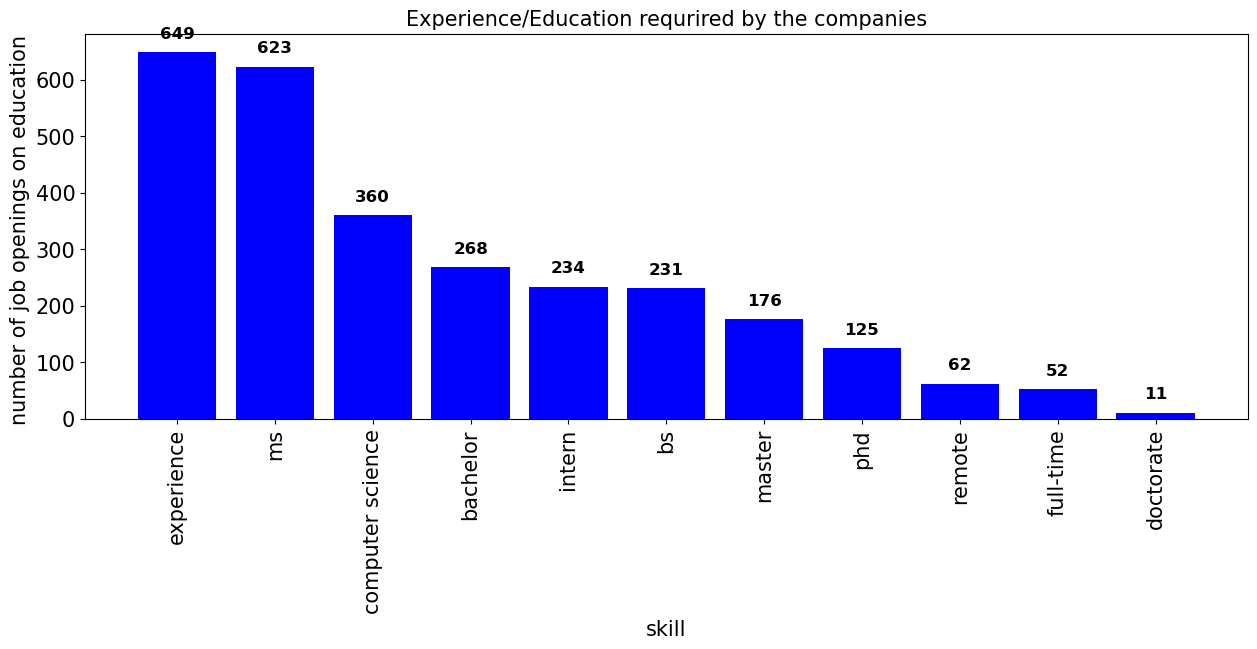

In [100]:
plt.figure(figsize = (15,5))
x = exp_edu_df["Education"]
y = exp_edu_df["count"]
plt.bar(x,y,color= "blue")
plt.title("Experience/Education requrired by the companies",fontsize=15)
plt.xlabel("Experience/Education",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in exp_edu_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');
plt.ylabel("number of job openings on education ",fontsize=15)
plt.xlabel("skill",fontsize=15)
plt.savefig('job openings on based on education.png', format='png',bbox_inches='tight');